Duffing equation:
$$ m_1{\ddot  {x_1}}+ c_1 {\dot  {x_1}}+  k_1 x_1 +  α x_1^3 +c_2({\dot{x_1}}-{\dot{x_2}}) + k_2(x_1-x_2) = \gamma \cos(\omega t)\,$$

$$ m_2{\ddot  {x_2}}+ c_2 ({\dot  {x_2}} - {\dot {x_1}})+ k_2(x_2-x_1) +c_3({\dot{x_2}}-{\dot{x_3}})+ k_3(x_2-x_3)  = \gamma \cos(\omega t)\,$$

$$ m_3{\ddot  {x_3}}+ c_3 ({\dot  {x_3}} - {\dot {x_2}})+ k_3(x_3-x_2) +c_4({\dot{x_3}}-{\dot{x_4}})+ k_4(x_3-x_4)  = \gamma \cos(\omega t)\,$$

$$ m_4{\ddot  {x_4}}+ c_4 ({\dot  {x_4}} - {\dot {x_3}})+ k_4(x_4-x_3) +c_5({\dot{x_4}}-{\dot{x_5}})+ k_5(x_4-x_5)  = \gamma \cos(\omega t)\,$$

$$ m_5{\ddot  {x_5}}+ c_5 ({\dot  {x_5}} - {\dot {x_4}})+ k_5(x_5-x_4) = \gamma \cos(\omega t)\,$$


# Initial check

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # for comparison
import math
from matplotlib.pyplot import figure
from mpmath import *

In [ ]:

def model(y,t):
    m1 = 3
    m2 = 3
    c1 = 5
    c2 = 5
    k1 = 5
    k2 = 5
    alpha = 0.5
    gamma1 = 5
    gamma2 = 5
    omega1 = 10
    omega2 = 5

    x1, v1, x2, v2 = y[0], y[1], y[2], y[3]

    dx1_dt = v1
    dv1_dt = (gamma1*(math.cos(omega1*t)) -c1*v1 -c2*(v1-v2) -k1*x1 -k2*(x1-x2) -alpha*(x1**3) -alpha*((x1-x2)**3) )/m1

    dx2_dt = v2
    dv2_dt = (gamma2*(math.cos(omega2*t)) -c2*(v2-x1) -k2*(v2-x1) -alpha*((x2-x1)**3) )/m2
    

    return np.array([dx1_dt, dv1_dt, dx2_dt, dv2_dt])

In [ ]:
y0 = [1,0,1,0]


In [ ]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2, t[i] + h / 2)
        k3 = f(y[i] + k2 * h / 2, t[i] + h / 2)
        k4 = f(y[i] + k3 * h, t[i] + h,)
        y[i+1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [ ]:
t = np.linspace(0, 50, 500)
sol = rungekutta4(model, y0, t)

<Figure size 432x288 with 0 Axes>

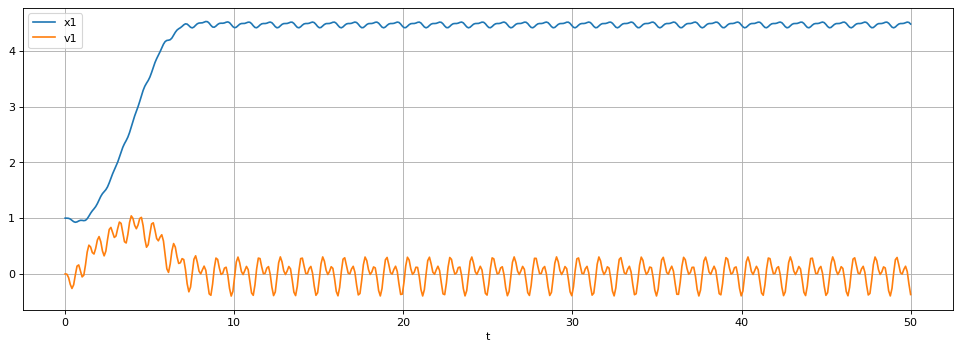

In [ ]:
plt.figure()
figure(figsize=(15, 5), dpi=80)
plt.plot(t, sol[:, 0], label='x1')
plt.plot(t, sol[:, 1], label='v1')


plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

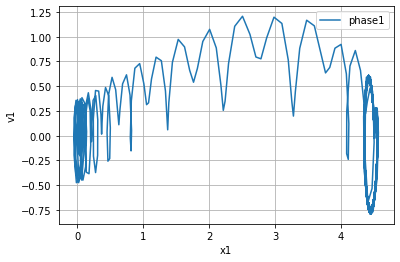

In [ ]:
plt.plot(sol[:,0],sol[:,], label='phase1')


plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('v1')
plt.grid()
plt.show()

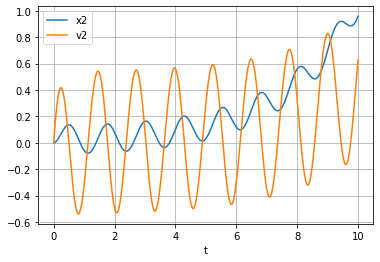

In [ ]:
plt.plot(t, sol[:, 2], label='x2')
plt.plot(t, sol[:, 3], label='v2')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

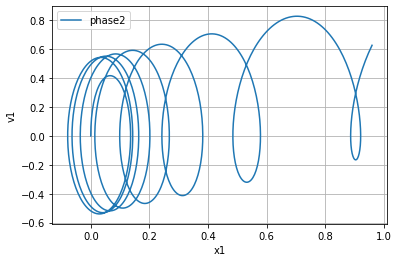

In [ ]:
plt.plot(sol[:,2],sol[:,3], label='phase2')


plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('v1')
plt.grid()
plt.show()

# Data Generation

In [ ]:
!pip install torchdiffeq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy.stats as stats
from torchdiffeq import odeint
from scipy.stats import truncnorm
import torch

def generate_traj(init_cond,m1,m2,m3,m4,m5,c1,c2,c3,c4,c5,k1,k2,k3,k4,k5,
                                        alpha,gamma,omega, dt, len_episode):

    def ode_sys(t, X):
        x1,v1=torch.Tensor([X[0]]),torch.Tensor([X[1]])
        x2,v2=torch.Tensor([X[2]]),torch.Tensor([X[3]])
        x3,v3=torch.Tensor([X[4]]),torch.Tensor([X[5]])
        x4,v4=torch.Tensor([X[6]]),torch.Tensor([X[7]])
        x5,v5=torch.Tensor([X[8]]),torch.Tensor([X[9]])


        dx1_dt = v1
        dv1_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c1*v1 - k1*x1 -alpha*(x1**3) -c2*(v1-v2) -k2*(x1-x2)) /m1])

        dx2_dt = v2
        dv2_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c2*(v2-v1) - k2*(x2-x1) -c3*(v2-v3) -k3*(x2-x3)) /m2])

        dx3_dt = v3
        dv3_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c3*(v3-v2) - k3*(x3-x2) -c4*(v3-v4) -k4*(x3-x4)) /m3])

        dx4_dt = v4
        dv4_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c4*(v4-v3) - k4*(x4-x3) -c5*(v4-v5) -k5*(x4-x5)) /m4])

        dx5_dt = v5
        dv5_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c5*(v5-v4) - k5*(x5-x4)) /m5])
        

        return torch.cat([dx1_dt, dv1_dt, dx2_dt, dv2_dt,dx3_dt, dv3_dt, dx4_dt, dv4_dt,dx5_dt, dv5_dt])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    
    sol = odeint(ode_sys,init_cond,t, method = 'euler').numpy()
    
    return t, sol  


In [ ]:
def generate_data(rng, n_samples, range_init_x1,range_init_v1,range_init_x2,range_init_v2,
                  range_init_x3,range_init_v3,range_init_x4,range_init_v4,
                  range_init_x5,range_init_v5,range_m1, range_m2,range_m3,range_m4,range_m5,
                  range_c1, range_c2,range_c3,range_c4,range_c5,range_k1,range_k2,
                  range_k3,range_k4,range_k5,range_alpha, range_gamma, range_omega,dt, len_episode, noise_std,
                  bound_x1,bound_v1,bound_m1,bound_c1,bound_k1,bound_x2,bound_v2,bound_m2,bound_c2,bound_k2,
                  bound_x3,bound_v3,bound_m3,bound_c3,bound_k3,bound_x4,bound_v4,bound_m4,bound_c4,bound_k4,
                  bound_x5,bound_v5,bound_m5,bound_c5,bound_k5):
  
      x1_a,x1_b = (bound_x1[0]-range_init_x1[0])/range_init_x1[1] , (bound_x1[1]-range_init_x1[0])/range_init_x1[1]
      v1_a,v1_b = (bound_v1[0]-range_init_v1[0])/range_init_v1[1] , (bound_v1[1]-range_init_v1[0])/range_init_v1[1]
      m1_a,m1_b = (bound_m1[0]-range_m1[0])/range_m1[1] , (bound_m1[1]-range_m1[0])/range_m1[1]
      c1_a,c1_b = (bound_c1[0]-range_c1[0])/range_c1[1] , (bound_c1[1]-range_c1[0])/range_c1[1]
      k1_a,k1_b = (bound_k1[0]-range_k1[0])/range_k1[1] , (bound_k1[1]-range_k1[0])/range_k1[1]

      x2_a,x2_b = (bound_x2[0]-range_init_x2[0])/range_init_x2[1] , (bound_x2[1]-range_init_x2[0])/range_init_x2[1]
      v2_a,v2_b = (bound_v2[0]-range_init_v2[0])/range_init_v2[1] , (bound_v2[1]-range_init_v2[0])/range_init_v2[1]
      m2_a,m2_b = (bound_m2[0]-range_m2[0])/range_m2[1] , (bound_m2[1]-range_m2[0])/range_m2[1]
      c2_a,c2_b = (bound_c2[0]-range_c2[0])/range_c2[1] , (bound_c2[1]-range_c2[0])/range_c2[1]
      k2_a,k2_b = (bound_k2[0]-range_k2[0])/range_k2[1] , (bound_k2[1]-range_k2[0])/range_k2[1]

      x3_a,x3_b = (bound_x3[0]-range_init_x3[0])/range_init_x3[1] , (bound_x3[1]-range_init_x3[0])/range_init_x3[1]
      v3_a,v3_b = (bound_v3[0]-range_init_v3[0])/range_init_v3[1] , (bound_v3[1]-range_init_v3[0])/range_init_v3[1]
      m3_a,m3_b = (bound_m3[0]-range_m3[0])/range_m3[1] , (bound_m3[1]-range_m3[0])/range_m3[1]
      c3_a,c3_b = (bound_c3[0]-range_c3[0])/range_c3[1] , (bound_c3[1]-range_c3[0])/range_c3[1]
      k3_a,k3_b = (bound_k3[0]-range_k3[0])/range_k3[1] , (bound_k3[1]-range_k3[0])/range_k3[1]

      x4_a,x4_b = (bound_x4[0]-range_init_x4[0])/range_init_x4[1] , (bound_x4[1]-range_init_x4[0])/range_init_x4[1]
      v4_a,v4_b = (bound_v4[0]-range_init_v4[0])/range_init_v4[1] , (bound_v4[1]-range_init_v4[0])/range_init_v4[1]
      m4_a,m4_b = (bound_m4[0]-range_m4[0])/range_m4[1] , (bound_m4[1]-range_m4[0])/range_m4[1]
      c4_a,c4_b = (bound_c4[0]-range_c4[0])/range_c4[1] , (bound_c4[1]-range_c4[0])/range_c4[1]
      k4_a,k4_b = (bound_k4[0]-range_k4[0])/range_k4[1] , (bound_k4[1]-range_k4[0])/range_k4[1]

      x5_a,x5_b = (bound_x5[0]-range_init_x5[0])/range_init_x5[1] , (bound_x5[1]-range_init_x5[0])/range_init_x5[1]
      v5_a,v5_b = (bound_v5[0]-range_init_v5[0])/range_init_v5[1] , (bound_v5[1]-range_init_v5[0])/range_init_v5[1]
      m5_a,m5_b = (bound_m5[0]-range_m5[0])/range_m5[1] , (bound_m5[1]-range_m5[0])/range_m5[1]
      c5_a,c5_b = (bound_c5[0]-range_c5[0])/range_c5[1] , (bound_c5[1]-range_c5[0])/range_c5[1]
      k5_a,k5_b = (bound_k5[0]-range_k5[0])/range_k5[1] , (bound_k5[1]-range_k5[0])/range_k5[1]

      
      init_x1 = torch.Tensor(stats.truncnorm.rvs(x1_a,x1_b,loc=range_init_x1[0], scale=range_init_x1[1], size=n_samples ))
      init_v1 = torch.Tensor(stats.truncnorm.rvs(v1_a,v1_b,loc=range_init_v1[0], scale=range_init_v1[1], size=n_samples ))
      init_x2 = torch.Tensor(stats.truncnorm.rvs(x2_a,x2_b,loc=range_init_x2[0], scale=range_init_x2[1], size=n_samples ))
      init_v2 = torch.Tensor(stats.truncnorm.rvs(v2_a,v2_b,loc=range_init_v2[0], scale=range_init_v2[1], size=n_samples ))
      init_x3 = torch.Tensor(stats.truncnorm.rvs(x3_a,x3_b,loc=range_init_x3[0], scale=range_init_x3[1], size=n_samples ))
      init_v3 = torch.Tensor(stats.truncnorm.rvs(v3_a,v3_b,loc=range_init_v3[0], scale=range_init_v3[1], size=n_samples ))
      init_x4 = torch.Tensor(stats.truncnorm.rvs(x4_a,x4_b,loc=range_init_x4[0], scale=range_init_x4[1], size=n_samples ))
      init_v4 = torch.Tensor(stats.truncnorm.rvs(v4_a,v4_b,loc=range_init_v4[0], scale=range_init_v4[1], size=n_samples ))
      init_x5 = torch.Tensor(stats.truncnorm.rvs(x5_a,x5_b,loc=range_init_x5[0], scale=range_init_x5[1], size=n_samples ))
      init_v5 = torch.Tensor(stats.truncnorm.rvs(v5_a,v5_b,loc=range_init_v5[0], scale=range_init_v5[1], size=n_samples ))

      m1 = torch.Tensor(stats.truncnorm.rvs(m1_a,m1_b,loc=range_m1[0], scale=range_m1[1], size=n_samples ))
      m2 = torch.Tensor(stats.truncnorm.rvs(m2_a,m2_b,loc=range_m2[0], scale=range_m2[1], size=n_samples ))
      m3 = torch.Tensor(stats.truncnorm.rvs(m3_a,m3_b,loc=range_m3[0], scale=range_m3[1], size=n_samples ))
      m4 = torch.Tensor(stats.truncnorm.rvs(m4_a,m4_b,loc=range_m4[0], scale=range_m4[1], size=n_samples ))
      m5 = torch.Tensor(stats.truncnorm.rvs(m5_a,m5_b,loc=range_m5[0], scale=range_m5[1], size=n_samples ))
      #torch.Tensor(stats.truncnorm.rvs(c_a,c_b,loc=range_c[0], scale=range_c[1], size=n_samples ))
      c1 = torch.Tensor(stats.truncnorm.rvs(c1_a,c1_b,loc=range_c1[0], scale=range_c1[1], size=n_samples ))
      c2 = torch.Tensor(stats.truncnorm.rvs(c2_a,c2_b,loc=range_c2[0], scale=range_c2[1], size=n_samples ))
      c3 = torch.Tensor(stats.truncnorm.rvs(c3_a,c3_b,loc=range_c3[0], scale=range_c3[1], size=n_samples ))
      c4 = torch.Tensor(stats.truncnorm.rvs(c4_a,c4_b,loc=range_c4[0], scale=range_c4[1], size=n_samples ))
      c5 = torch.Tensor(stats.truncnorm.rvs(c5_a,c5_b,loc=range_c5[0], scale=range_c5[1], size=n_samples ))
      k1 = torch.Tensor(stats.truncnorm.rvs(k1_a,k1_b,loc=range_k1[0], scale=range_k1[1], size=n_samples ))
      k2 = torch.Tensor(stats.truncnorm.rvs(k2_a,k2_b,loc=range_k2[0], scale=range_k2[1], size=n_samples ))
      k3 = torch.Tensor(stats.truncnorm.rvs(k3_a,k3_b,loc=range_k3[0], scale=range_k3[1], size=n_samples ))
      k4 = torch.Tensor(stats.truncnorm.rvs(k4_a,k4_b,loc=range_k4[0], scale=range_k4[1], size=n_samples ))
      k5 = torch.Tensor(stats.truncnorm.rvs(k5_a,k5_b,loc=range_k5[0], scale=range_k5[1], size=n_samples ))  
      alpha = torch.Tensor(np.random.normal(loc=range_alpha[0], scale=range_alpha[1], size=n_samples))
      gamma = torch.Tensor(np.random.normal(loc=range_gamma[0], scale=range_gamma[1], size=n_samples))
      omega = torch.Tensor(np.random.normal(loc=range_omega[0], scale=range_omega[1], size=n_samples))

      # solve ODE
      x = np.empty((n_samples, len_episode,10))      

      for i in range(n_samples):
          init_cond= torch.cat([init_x1[[i]],init_v1[[i]],init_x2[[i]],init_v2[[i]],init_x3[[i]],init_v3[[i]],init_x4[[i]],init_v4[[i]],init_x5[[i]],init_v5[[i]]])
          t, x_i = generate_traj(init_cond,
                                m1[i],m2[i],m3[i],m4[i],m5[i],c1[i],c2[i],c3[i],c4[i],c5[i],
                                k1[i],k2[i],k3[i],k4[i],k5[i],alpha[i],gamma[i],omega[i], dt, len_episode)
          #print(x_i.shape)
          
          x[i,:,:] = x_i
          #print(x.shape)

      # observation noise
      x = x + rng.normal(loc=0.0, scale=noise_std, size=x.shape)

      return t, x,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,init_x4,init_v4,init_x5,init_v5,m1,m2,m3,m4,m5,c1,c2,c3,c4,c5,k1,k2,k3,k4,k5


In [ ]:
# save data
def save_data(name,data):
  np.save('data_{}.npy'.format(name),data)
  print("saved data")

  #np.savetxt('data_{}.txt'.format(name), data)
  

  # # save true parameters
  # np.savetxt('true_params_{}.txt'.format(name),
  #     np.stack([inits, m1,m2,m3,m4,m5,c1,c2,c3,c4,c5,k1,k2,k3,k4,k5,alpha, gamma, omega ], axis=1), fmt='%.9e',
  #     header='inits  m1 m2 m3 m4 m5 c1 c2 c3 c4 c5 k1 k2 k3 k4 k5 alpha gamma omega')
  # print('saved true parameters')


In [ ]:

# len_episode= 400  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [50,1.25]
# range_c= [20,2] 
# range_k= [1000,150]
# range_alpha= [100,0]
# range_gamma=  [500,0]  
# range_omega= [2.5,0] 
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_m = [46.25,53.75]
# bound_c = [14,26]
# bound_k = [550,1450]


In [ ]:
len_episode=200  # time = len_episode * dt
range_init_x1= [0.01,0.001]
range_init_v1= [0.01,0.001]
range_init_x2= [0.01,0.001]
range_init_v2= [0.01,0.001]
range_init_x3= [0.01,0.002]
range_init_v3= [0.01,0.002]
range_init_x4= [0.01,0.002]
range_init_v4= [0.01,0.002]
range_init_x5= [0.01,0.002]
range_init_v5= [0.01,0.002]
range_m1 = [50,1.5]
range_m2 = [50,1.5]
range_m3 = [50,2]
range_m4 = [50,2]
range_m5 = [50,2.5]
range_c1 = [20,2]
range_c2 = [20,2]
range_c3 = [20,2.5]
range_c4 = [20,2.5]
range_c5 = [20,3]
range_k1 = [1000,100]
range_k2 = [1000,100]
range_k3 = [1000,150]
range_k4 = [1000,150]
range_k5 = [1000,150]
range_alpha = [100,0]
range_gamma = [500,0]
range_omega = [2.5,0]


In [ ]:
bound_x1 = [range_init_x1[0]-3*range_init_x1[1],range_init_x1[0]+3*range_init_x1[1]]
bound_v1 = [range_init_v1[0]-3*range_init_v1[1],range_init_v1[0]+3*range_init_v1[1]]
bound_m1 = [range_m1[0]-3*range_m1[1], range_m1[0]+3*range_m1[1]]
bound_c1 = [range_c1[0]-3*range_c1[1], range_c1[0]+3*range_c1[1]]
bound_k1 = [range_k1[0]-3*range_k1[1], range_k1[0]+3*range_k1[1]]

bound_x2 = [range_init_x2[0]-3*range_init_x2[1],range_init_x2[0]+3*range_init_x2[1]]
bound_v2 = [range_init_v2[0]-3*range_init_v2[1],range_init_v2[0]+3*range_init_v2[1]]
bound_m2 = [range_m2[0]-3*range_m2[1], range_m2[0]+3*range_m2[1]]
bound_c2 = [range_c2[0]-3*range_c2[1], range_c2[0]+3*range_c2[1]]
bound_k2 = [range_k2[0]-3*range_k2[1], range_k2[0]+3*range_k2[1]]

bound_x3 = [range_init_x3[0]-3*range_init_x3[1],range_init_x3[0]+3*range_init_x3[1]]
bound_v3 = [range_init_v3[0]-3*range_init_v3[1],range_init_v3[0]+3*range_init_v3[1]]
bound_m3 = [range_m3[0]-3*range_m3[1], range_m3[0]+3*range_m3[1]]
bound_c3 = [range_c3[0]-3*range_c3[1], range_c3[0]+3*range_c3[1]]
bound_k3 = [range_k3[0]-3*range_k3[1], range_k3[0]+3*range_k3[1]]

bound_x4 = [range_init_x4[0]-3*range_init_x4[1],range_init_x4[0]+3*range_init_x4[1]]
bound_v4 = [range_init_v4[0]-3*range_init_v4[1],range_init_v4[0]+3*range_init_v4[1]]
bound_m4 = [range_m4[0]-3*range_m4[1], range_m4[0]+3*range_m4[1]]
bound_c4 = [range_c4[0]-3*range_c4[1], range_c4[0]+3*range_c4[1]]
bound_k4 = [range_k4[0]-3*range_k4[1], range_k4[0]+3*range_k4[1]]

bound_x5 = [range_init_x5[0]-3*range_init_x5[1],range_init_x5[0]+3*range_init_x5[1]]
bound_v5 = [range_init_v5[0]-3*range_init_v5[1],range_init_v5[0]+3*range_init_v5[1]]
bound_m5 = [range_m5[0]-3*range_m5[1], range_m5[0]+3*range_m5[1]]
bound_c5 = [range_c5[0]-3*range_c5[1], range_c5[0]+3*range_c5[1]]
bound_k5 = [range_k5[0]-3*range_k5[1], range_k5[0]+3*range_k5[1]]


In [ ]:

dt=0.02
noise_std=0.001
kwargs = {'range_init_x1': range_init_x1, 'range_init_v1': range_init_v1, 'range_init_x2': range_init_x2, 
          'range_init_v2': range_init_v2,'range_init_x3': range_init_x3,  'range_init_v3': range_init_v3, 
          'range_init_x4': range_init_x4,   'range_init_v4': range_init_v4, 
          'range_init_x5': range_init_x5, 'range_init_v5': range_init_v5, 

          'range_m1': range_m1,'range_m2': range_m2,'range_m3': range_m3,'range_m4': range_m4,'range_m5': range_m5,
          'range_c1': range_c1,'range_c2': range_c2,'range_c3': range_c3,'range_c4': range_c4,'range_c5': range_c5,
          'range_k1': range_k1,'range_k2': range_k2,'range_k3': range_k3,'range_k4': range_k4,'range_k5': range_k5,
          'range_alpha': range_alpha,'range_gamma': range_gamma,'range_omega': range_omega,          
          'dt': dt, 'len_episode':len_episode, 'noise_std':noise_std,
          'bound_x1':bound_x1, 'bound_v1':bound_v1, 'bound_m1':bound_m1,'bound_c1':bound_c1, 'bound_k1':bound_k1,
          'bound_x2':bound_x2, 'bound_v2':bound_v2, 'bound_m2':bound_m2,'bound_c2':bound_c2, 'bound_k2':bound_k2,
          'bound_x3':bound_x3, 'bound_v3':bound_v3, 'bound_m3':bound_m3,'bound_c3':bound_c3, 'bound_k3':bound_k3,
          'bound_x4':bound_x4, 'bound_v4':bound_v4, 'bound_m4':bound_m4,'bound_c4':bound_c4, 'bound_k4':bound_k4,
          'bound_x5':bound_x5, 'bound_v5':bound_v5, 'bound_m5':bound_m5,'bound_c5':bound_c5, 'bound_k5':bound_k5}


In [ ]:
## function to choose between training,test and validation data

def data_divider(name):
  if name == "train":
    rng_param=1236
    n_samples=500
    return rng_param,n_samples,name

    
  elif name == "valid":
    rng_param=1235
    n_samples=50
    return rng_param,n_samples,name    
  
  else:
    print("invalid input")
  

In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("train")
print(rng_param)
print(n_samples)
print(name)


1236
500
train


In [ ]:
#generating and saving the data  
t, data,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3, init_x4,init_v4,init_x5,init_v5,m1,m2,m3,m4,m5,c1,c2,c3,c4,c5, k1,k2,k3,k4,k5= generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data)

saved data


storing min-max values

In [ ]:
data_params = np.loadtxt('true_params_train.txt')
data_params.shape

(500, 28)

In [ ]:
init_x1 = data_params[:,0]
init_v1 =data_params[:,1]
init_x2 =data_params[:,2]
init_v2=data_params[:,3] 
init_x3 =data_params[:,4]
init_v3 =data_params[:,5]

init_x4 =data_params[:,6]
init_v4 =data_params[:,7]
init_x5 =data_params[:,8]
init_v5 =data_params[:,9]
m1 =data_params[:,10]
m2 =data_params[:,11]
m3 =data_params[:,12]
m4 =data_params[:,13]
m5 =data_params[:,14]
c1 =data_params[:,15]
c2 =data_params[:,16]
c3 =data_params[:,17]
c4 =data_params[:,18]
c5 =data_params[:,19]
k1 =data_params[:,20]
k2 =data_params[:,21]
k3 =data_params[:,22]
k4 =data_params[:,23]
k5 =data_params[:,24]
alpha =data_params[:,25]
gamma =data_params[:,26]
omega =data_params[:,27]

In [ ]:
x1_o_min = init_x1.min()
x1_o_max = init_x1.max() 
v1_o_min = init_v1.min()
v1_o_max = init_v1.max() 
x2_o_min = init_x2.min()
x2_o_max = init_x2.max() 
v2_o_min = init_v2.min()
v2_o_max = init_v2.max() 
x3_o_min = init_x3.min()
x3_o_max = init_x3.max() 
v3_o_min = init_v3.min()
v3_o_max = init_v3.max() 
x4_o_min = init_x4.min()
x4_o_max = init_x4.max() 
v4_o_min = init_v4.min()
v4_o_max = init_v4.max() 
x5_o_min = init_x5.min()
x5_o_max = init_x5.max() 
v5_o_min = init_v5.min()
v5_o_max = init_v5.max() 

m1_o_min = m1.min()
m1_o_max = m1.max()
m2_o_min = m2.min()
m2_o_max = m2.max()
m3_o_min = m3.min()
m3_o_max = m3.max()
m4_o_min = m4.min()
m4_o_max = m4.max()
m5_o_min = m5.min()
m5_o_max = m5.max()

c1_o_min = c1.min()
c1_o_max = c1.max()
c2_o_min = c2.min()
c2_o_max = c2.max()
c3_o_min = c3.min()
c3_o_max = c3.max()
c4_o_min = c4.min()
c4_o_max = c4.max()
c5_o_min = c5.min()
c5_o_max = c5.max()

k1_o_min = k1.min()
k1_o_max = k1.max()
k2_o_min = k2.min()
k2_o_max = k2.max()
k3_o_min = k3.min()
k3_o_max = k3.max()
k4_o_min = k4.min()
k4_o_max = k4.max()
k5_o_min = k5.min()
k5_o_max = k5.max()

In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("valid")
print(rng_param)
print(n_samples)
print(name)

1235
50
valid


In [ ]:
#generating and saving the data  
tv, datav,init_x1v,init_v1v,init_x2v,init_v2v,init_x3v,init_v3v, init_x4v,init_v4v,init_x5v,init_v5v,m1v,m2v,m3v,m4v,m5v,c1v,c2v,c3v,c4v,c5v, k1v,k2v,k3v,k4v,k5v= generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data)

saved data


In [ ]:
data_train_1 = np.load('data_train.npy')

In [ ]:
data_train_1.shape

(500, 200, 10)

In [ ]:
data_train_dis1 = data_train_1[:,:,0]

data_train_dis2 = data_train_1[:,:,2]

data_train_dis3 = data_train_1[:,:,4]

data_train_dis4 = data_train_1[:,:,6]

data_train_dis5 = data_train_1[:,:,8]


<Figure size 432x288 with 0 Axes>

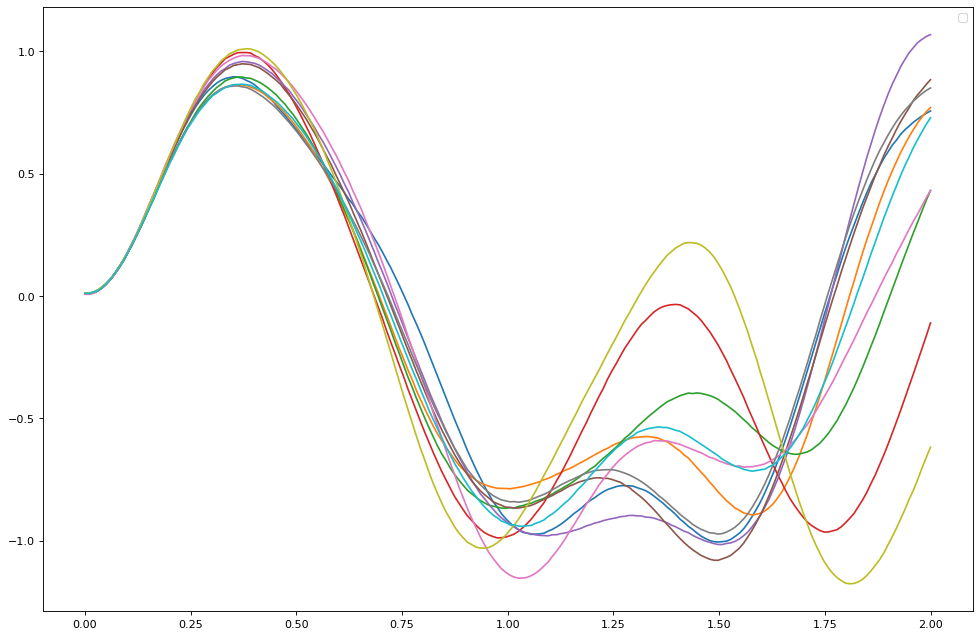

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
t = np.linspace(0.0, 2,200)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)
for i in range(10):
    plt.plot(t,data_train_dis1[i])
    #plt.plot(t,data_train_vel1[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

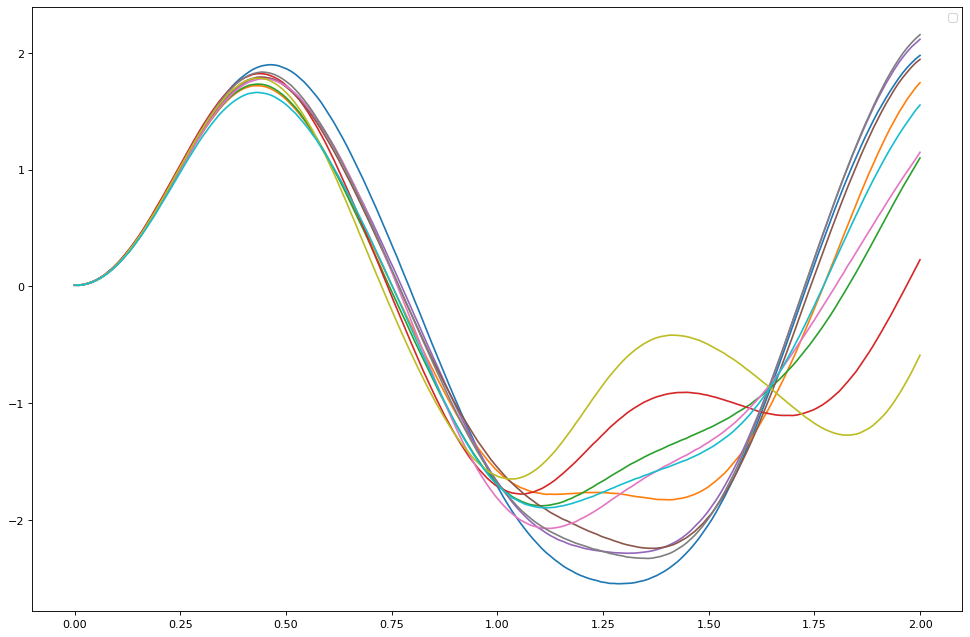

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)

for i in range(10):
    plt.plot(t,data_train_dis2[i])
    #plt.plot(t,data_train_vel2[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

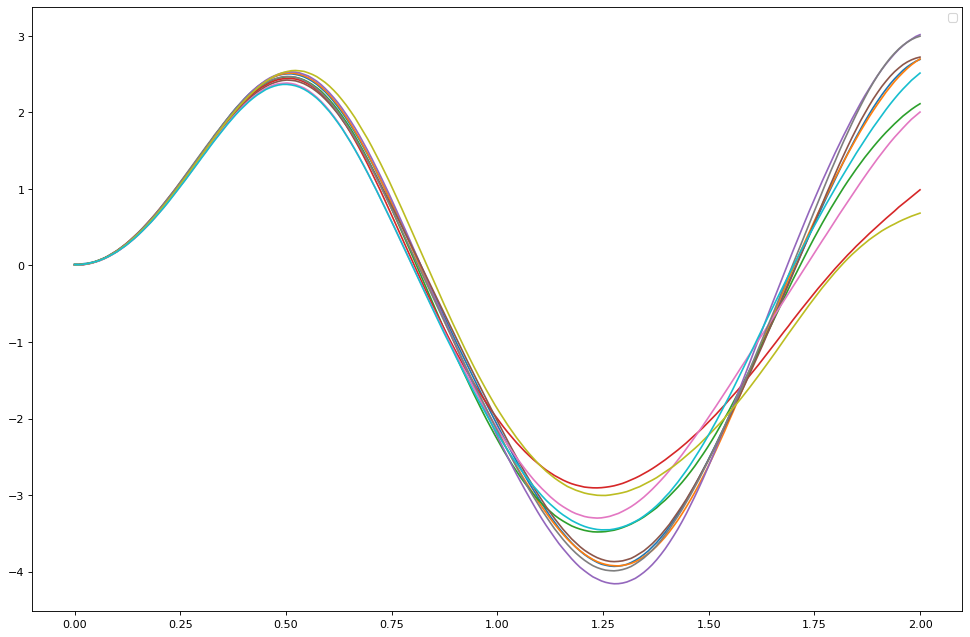

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)

for i in range(10):
    plt.plot(t,data_train_dis3[i])
    #plt.plot(t,data_train_vel3[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

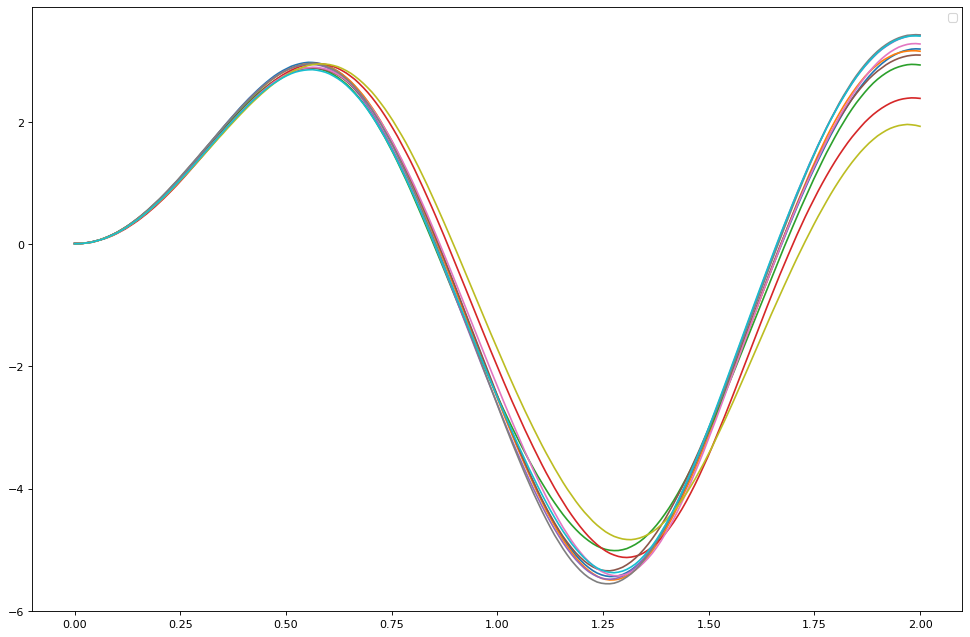

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)

for i in range(10):
    plt.plot(t,data_train_dis4[i])
    #plt.plot(t,data_train_vel4[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

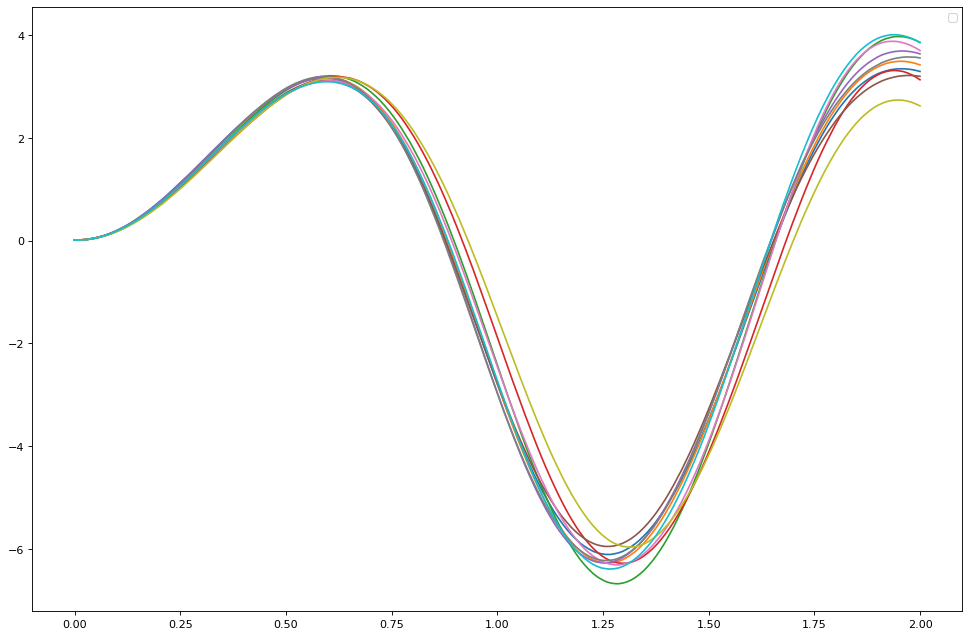

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)
for i in range(10):
    plt.plot(t,data_train_dis5[i])
    #plt.plot(t,data_train_vel5[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

In [ ]:
# cf_x1_true_dis_std =[]
# cf_x1_true_dis_T = data_train_dis1.T
# for y in cf_x1_true_dis_T:
#    #print(x.shape)
#     cf_x1_true_dis_std.append(y.var())

# cf_x2_true_dis_std =[]
# cf_x2_true_dis_T = data_train_dis2.T
# for y in cf_x2_true_dis_T:
#    #print(x.shape)
#     cf_x2_true_dis_std.append(y.var())


# cf_x3_true_dis_std =[]
# cf_x3_true_dis_T = data_train_dis3.T
# for y in cf_x3_true_dis_T:
#    #print(x.shape)
#     cf_x3_true_dis_std.append(y.var())

# cf_x4_true_dis_std =[]
# cf_x4_true_dis_T = data_train_dis4.T
# for y in cf_x4_true_dis_T:
#    #print(x.shape)
#     cf_x4_true_dis_std.append(y.var())

# cf_x5_true_dis_std =[]
# cf_x5_true_dis_T = data_train_dis5.T
# for y in cf_x5_true_dis_T:
#    #print(x.shape)
#     cf_x5_true_dis_std.append(y.var())



In [ ]:
# plt.plot(t,cf_x1_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

In [ ]:
# plt.plot(t,cf_x2_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

In [ ]:
# plt.plot(t,cf_x3_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

In [ ]:
# plt.plot(t,cf_x4_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

In [ ]:
# plt.plot(t,cf_x5_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

In [ ]:
x1_mean = init_x1.mean()
x1_std = init_x1.std() 
v1_mean = init_v1.mean()
v1_std = init_v1.std() 
x2_mean = init_x2.mean()
x2_std = init_x2.std() 
v2_mean = init_v2.mean()
v2_std = init_v2.std() 
x3_mean = init_x3.mean()
x3_std = init_x3.std() 
v3_mean = init_v3.mean()
v3_std = init_v3.std()
x4_mean = init_x4.mean()
x4_std = init_x4.std() 
v4_mean = init_v4.mean()
v4_std = init_v4.std()
x5_mean = init_x5.mean()
x5_std = init_x5.std() 
v5_mean = init_v5.mean()
v5_std = init_v5.std() 

c1_mean = c1.mean()
c1_std = c1.std()
c2_mean = c2.mean()
c2_std = c2.std()
c3_mean = c3.mean()
c3_std = c3.std()
c4_mean = c4.mean()
c4_std = c4.std()
c5_mean = c5.mean()
c5_std = c5.std()

k1_mean = k1.mean()
k1_std = k1.std()
k2_mean = k2.mean()
k2_std = k2.std()
k3_mean = k3.mean()
k3_std = k3.std()
k4_mean = k4.mean()
k4_std = k4.std()
k5_mean = k5.mean()
k5_std = k5.std()

# Normalizing data

In [ ]:
x1_new = (init_x1-x1_o_min)/(x1_o_max - x1_o_min)
v1_new = (init_v1-v1_o_min)/(v1_o_max - v1_o_min)
m1_new = (m1-m1_o_min)/(m1_o_max - m1_o_min)
c1_new = (c1-c1_o_min)/(c1_o_max - c1_o_min)
k1_new = (k1-k1_o_min)/(k1_o_max - k1_o_min)

x2_new = (init_x2-x2_o_min)/(x2_o_max - x2_o_min)
v2_new = (init_v2-v2_o_min)/(v2_o_max - v2_o_min)
m2_new = (m2-m2_o_min)/(m2_o_max - m2_o_min)
c2_new = (c2-c2_o_min)/(c2_o_max - c2_o_min)
k2_new = (k2-k2_o_min)/(k2_o_max - k2_o_min)

x3_new = (init_x3-x3_o_min)/(x3_o_max - x3_o_min)
v3_new = (init_v3-v3_o_min)/(v3_o_max - v3_o_min)
m3_new = (m3-m3_o_min)/(m3_o_max - m3_o_min)
c3_new = (c3-c3_o_min)/(c3_o_max - c3_o_min)
k3_new = (k3-k3_o_min)/(k3_o_max - k3_o_min)

x4_new = (init_x4-x4_o_min)/(x4_o_max - x4_o_min)
v4_new = (init_v4-v4_o_min)/(v4_o_max - v4_o_min)
m4_new = (m4-m4_o_min)/(m4_o_max - m4_o_min)
c4_new = (c5-c5_o_min)/(c5_o_max - c5_o_min)
k4_new = (k5-k5_o_min)/(k5_o_max - k5_o_min)

x5_new = (init_x5-x5_o_min)/(x5_o_max - x5_o_min)
v5_new = (init_v5-v5_o_min)/(v5_o_max - v5_o_min)
m5_new = (m5-m5_o_min)/(m5_o_max - m5_o_min)
c5_new = (c5-c5_o_min)/(c5_o_max - c5_o_min)
k5_new = (k5-k5_o_min)/(k5_o_max - k5_o_min)



In [ ]:

x1_mean = x1_new.mean() 
x1_std = x1_new.std()
v1_mean = v1_new.mean() 
v1_std = v1_new.std()
m1_mean = m1_new.mean() 
m1_std = m1_new.std()
c1_mean = c1_new.mean() 
c1_std = c1_new.std()
k1_mean = k1_new.mean() 
k1_std = k1_new.std()


x2_mean = x2_new.mean() 
x2_std = x2_new.std()
v2_mean = v2_new.mean() 
v2_std = v2_new.std()
m2_mean = m2_new.mean() 
m2_std = m2_new.std()
c2_mean = c2_new.mean() 
c2_std = c2_new.std()
k2_mean = k2_new.mean() 
k2_std = k2_new.std()


x3_mean = x3_new.mean() 
x3_std = x3_new.std()
v3_mean = v3_new.mean() 
v3_std = v3_new.std()
m3_mean = m3_new.mean() 
m3_std = m3_new.std()
c3_mean = c3_new.mean() 
c3_std = c3_new.std()
k3_mean = k3_new.mean() 
k3_std = k3_new.std()


x4_mean = x4_new.mean() 
x4_std = x4_new.std()
v4_mean = v4_new.mean() 
v4_std = v4_new.std()
m4_mean = m4_new.mean() 
m4_std = m4_new.std()
c4_mean = c4_new.mean() 
c4_std = c4_new.std()
k4_mean = k4_new.mean() 
k4_std = k4_new.std()


x4_mean = x4_new.mean() 
x4_std = x4_new.std()
v4_mean = v4_new.mean() 
v4_std = v4_new.std()
m4_mean = m4_new.mean() 
m4_std = m4_new.std()
c4_mean = c4_new.mean() 
c4_std = c4_new.std()
k4_mean = k4_new.mean() 
k4_std = k4_new.std()

In [ ]:
lower_x1 = x1_new.min()
upper_x1 = x1_new.max() 
lower_v1 = v1_new.min()
upper_v1 = v1_new.max() 
lower_m1 = 1e-6
upper_m1 = m1_new.max() 
lower_c1 = c1_new.min() 
upper_c1 = c1_new.max() 
lower_k1 = k1_new.min() 
upper_k1 = k1_new.max() 

lower_x2 = x2_new.min()
upper_x2 = x2_new.max() 
lower_v2 = v2_new.min()
upper_v2 = v2_new.max() 
lower_m2 = 1e-6
upper_m2 = m2_new.max() 
lower_c2 = c2_new.min() 
upper_c2 = c2_new.max() 
lower_k2 = k2_new.min() 
upper_k2 = k2_new.max() 

lower_x3 = x3_new.min()
upper_x3 = x3_new.max() 
lower_v3 = v3_new.min()
upper_v3 = v3_new.max() 
lower_m3 = 1e-6
upper_m3 = m3_new.max() 
lower_c3 = c3_new.min() 
upper_c3 = c3_new.max() 
lower_k3 = k3_new.min() 
upper_k3 = k3_new.max() 

lower_x4 = x4_new.min()
upper_x4 = x4_new.max() 
lower_v4 = v4_new.min()
upper_v4 = v4_new.max() 
lower_m4 = 1e-6
upper_m4 = m4_new.max() 
lower_c4 = c4_new.min() 
upper_c4 = c4_new.max() 
lower_k4 = k4_new.min() 
upper_k4 = k4_new.max() 

lower_x5 = x5_new.min()
upper_x5 = x5_new.max() 
lower_v5 = v5_new.min()
upper_v5 = v5_new.max() 
lower_m5 = 1e-6
upper_m5 = m5_new.max() 
lower_c5 = c5_new.min() 
upper_c5 = c5_new.max() 
lower_k5 = k5_new.min() 
upper_k5 = k5_new.max() 

# Load data

In [ ]:
import numpy as np

data_train_1 = np.load('data_train.npy')

data_train_dis1 = data_train_1[:,:,0]
data_train_dis2 = data_train_1[:,:,2]
data_train_dis3 = data_train_1[:,:,4]
data_train_dis4 = data_train_1[:,:,6]
data_train_dis5 = data_train_1[:,:,8]


In [ ]:
# load training/validation data for 1st DOF
data_valid_1 = np.load('data_valid.npy')


data_valid_dis1 = data_valid_1[:,:,0]
data_valid_dis2 = data_valid_1[:,:,2]
data_valid_dis3 = data_valid_1[:,:,4]
data_valid_dis4 = data_valid_1[:,:,6]
data_valid_dis5 = data_valid_1[:,:,8]



# Helper functions

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def actmodule(activation:str):
    if activation == 'softplus':
        return nn.Softplus()
    elif activation == 'relu':
        return nn.ReLU()
    elif activation == 'leakyrelu':
        return nn.LeakyReLU()
    elif activation == 'prelu':
        return nn.PReLU()
    elif activation == 'elu':
        return nn.ELU()
    elif activation == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError('unknown activation function specified')



def kernel_mat_gauss(sample:torch.Tensor, width:float):
    # https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065/
    #euclidean norm
    norm = (sample**2).sum(1).view(-1, 1)
    #distance matrix
    dist_mat = norm + norm.view(1,-1) - 2.0 * torch.mm(sample, torch.transpose(sample,0,1))
    dist_mat[dist_mat != dist_mat] = 0.0
    # width = torch.max(torch.ones(1,device=sample.device)*1e-4, torch.median(dist_mat).detach())
    return torch.exp(-dist_mat / width)



def hsic(kmat1:torch.Tensor, kmat2:torch.Tensor):
    """
    Unbiased estimator of HSIC [Song+ ICML 2007]
    """
    m = kmat1.shape[0]
    assert m>3
    device = kmat1.device
    K1 = (1.0 - torch.eye(m, device=device)) * kmat1
    K2 = (1.0 - torch.eye(m, device=device)) * kmat2
    return ( torch.sum(K1*K2.T) + torch.sum(K1)*torch.sum(K2)/(m-1)/(m-2) \
            - torch.sum(torch.sum(K1,dim=0)*torch.sum(K2,dim=1))*2/(m-2) ) / m / (m-3)



def mmd(kmat11:torch.Tensor, kmat22:torch.Tensor, kmat12:torch.Tensor):
    """
    Estimator of MMD
    """
    m1 = kmat11.shape[0]
    m2 = kmat22.shape[0]
    return torch.sum(kmat11)/m1/m1 + torch.sum(kmat22)/m2/m2 - 2.0*torch.sum(kmat12)/m1/m2


def nll_normal(data:torch.Tensor, mean:torch.Tensor, lnvar:torch.Tensor):
    """
    Negative log likelihood based on normal observation model, -log N(data | mean1, diag(exp(lnvar)))
    """
    d = data.shape[1]
    if lnvar.ndim==2:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2)/lnvar.exp(), dim=1) + 0.5*torch.sum(lnvar, dim=1)
    else:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2), dim=1)/lnvar.exp() + 0.5*d*lnvar
    return nll



def kldiv_logits_logits(logits1:torch.Tensor, logits2:torch.Tensor):
    """
    KL divergence between categorical distributions represented by sets of logits
    """
    # KL(q(z_phy|x) or p(z_phy) || p(z_phy))
    #   = \sum_i q_i (logit_q_i - logit_p_i) - (lse(logits_q) - lse(logits_p))
    logits1_logsumexp = torch.logsumexp(logits1, dim=1)
    logits2_logsumexp = torch.logsumexp(logits2, dim=1)
    probs1 = torch.exp(logits1 - logits1_logsumexp.unsqueeze(1))
    return torch.sum(probs1 * (logits1-logits2), dim=1) - (logits1_logsumexp-logits2_logsumexp)



def kldiv_normal_normal(mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    KL divergence between normal distributions, KL( N(mean1, diag(exp(lnvar1))) || N(mean2, diag(exp(lnvar2))) )
    """
    if lnvar1.ndim==2 and lnvar2.ndim==2:

        return 0.5 * torch.sum((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1 + (mean2-mean1).pow(2)/lnvar2.exp(), dim=1)
        
    elif lnvar1.ndim==1 and lnvar2.ndim==1:
        d = mean1.shape[1]
        return 0.5 * (d*((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1) + torch.sum((mean2-mean1).pow(2), dim=1)/lnvar2.exp())
    else:
        raise ValueError()



def pdfratio_normal(data:torch.Tensor, mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    Value of ratio of pdfs, N(mean1, diag(exp(lnvar1))) / N(mean2, diag(exp(lnvar2)))
    """
    lnpdf1 = -nll_normal(data, mean1, lnvar1)
    lnpdf2 = -nll_normal(data, mean2, lnvar2)
    return torch.exp(lnpdf1 - lnpdf2)


def draw_normal(mean:torch.Tensor, lnvar:torch.Tensor):
    std = torch.exp(0.5*lnvar)
    eps = torch.randn_like(std) # reparametrization trick
    return mean + eps*std


#for plotting 

def set_default(figsize=(0, 10), dpi=100):    
    plt.rc('axes', facecolor='white')
    plt.rc('figure', facecolor='white')
    plt.rc('figure', figsize=figsize, dpi=dpi)


# Define device

In [ ]:
cuda = False and torch.cuda.is_available()
device = torch.device("cpu")
device

device(type='cpu')

In [ ]:
torch.cuda.is_available()

False

# MLP

In [ ]:
import torch
import torch.nn as nn

#from . import utils
# import utils


class MLP(nn.Module):
    """Multi-layer perceptron.
    """
    def __init__(self, dims_all:list, activation:str,
                 dropout:float=0.6, batchnorm:bool=False, actfun_output:bool=False, binary_output:bool=False):
        super(MLP, self).__init__()

        modules = []

        # from first to second-last layer
        for i in range(len(dims_all)-2):
            # fully-connected
            modules.append(nn.Linear(dims_all[i], dims_all[i+1]))
            # batch normalization if any
            if batchnorm:
                modules.append(nn.BatchNorm1d(dims_all[i+1]))
            # nonlinear activation
            modules.append(activation)
            # dropout if any
            if dropout>0.0:
                modules.append(nn.Dropout(p=dropout))

        # last layer
        modules.append(nn.Linear(dims_all[-2], dims_all[-1]))
        if actfun_output:
            modules.append(activation)
        if binary_output:
            modules.append(nn.Sigmoid())

        self.net = nn.Sequential(*modules)
        self.dim_in = dims_all[0]


    def forward(self, x:torch.Tensor):
        out = self.net(x.view(-1, self.dim_in))
        return out


# VAE: Displacement 2

$$ m_2{\ddot  {x_2}}+ c_2 {\dot  {x_2}}+ k_2 x_2 +c_3{\dot{x_2}}+ k_3 x_2 =0 \,$$

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

from torchdiffeq import odeint


class Decoders_dis2(nn.Module):
    def __init__(self,config_dis2):
        super(Decoders_dis2, self).__init__()

        dim_t = config_dis2['dim_t']
        
        dim_z_aux5 = config_dis2['dim_z_aux5']
        dim_z_aux6 = config_dis2['dim_z_aux6']
        activation = config_dis2['activation']
        no_phy = config_dis2['no_phy']
        x_lnvar = config_dis2['x_lnvar']        

        # x_lnvar
        self.register_buffer('param_x_lnvar', torch.ones(1)*x_lnvar)

        if dim_z_aux5 >= 0:
            hidlayers_aux1 = config_dis2['hidlayers_aux1_dec']

            # z_aux1, yy (=[y, y_dot]) & t --> time-derivative of y_dot
            #(dim_z_aux5 + 2+1, 1)            
            self.func_aux5 = MLP([dim_z_aux5+2+1,]+hidlayers_aux1+[1,], activation)

        if dim_z_aux6 >= 0:
            hidlayers_aux2 = config_dis2['hidlayers_aux2_dec']
            # z_phy, z_aux2 --> x - y_seq
            dim_z_phy = 0 if no_phy else 7    #(m2,c2,k2,c3,k3,init_x2,init_v2)
            self.func_aux6_res = MLP([dim_z_phy+max(0,dim_z_aux5)+dim_z_aux6,]+hidlayers_aux2+[dim_t,], activation)



class Encoders_dis2(nn.Module):
    def __init__(self, config_dis2):
        super(Encoders_dis2, self).__init__()

        dim_t = config_dis2['dim_t']
        
        dim_z_aux5 = config_dis2['dim_z_aux5']
        dim_z_aux6 = config_dis2['dim_z_aux6']
        activation = config_dis2['activation']
        no_phy = config_dis2['no_phy']
        num_units_feat = config_dis2['num_units_feat']

        if dim_z_aux5 > 0:
            hidlayers_aux1_enc = config_dis2['hidlayers_aux1_enc']

            # x --> feature_aux5
            self.func_feat_aux5 = FeatureExtractor(config_dis2)

            # feature_aux5 --> z_aux1
            self.func_z_aux5_mean = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux5,], activation)
            self.func_z_aux5_lnvar = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux5,], activation)

        if dim_z_aux6 > 0:
            hidlayers_aux2_enc = config_dis2['hidlayers_aux2_enc']

            # x --> feature_aux6
            self.func_feat_aux6 = FeatureExtractor(config_dis2)

            # feature_aux6 --> z_aux2
            self.func_z_aux6_mean = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux6,], activation)
            self.func_z_aux6_lnvar = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux6,], activation)

        if not no_phy:
            hidlayers_unmixer = config_dis2['hidlayers_unmixer']
            
            hidlayers_m2 = config_dis2['hidlayers_m2']
            hidlayers_c2 = config_dis2['hidlayers_c2']
            hidlayers_k2 = config_dis2['hidlayers_k2']
            hidlayers_c3 = config_dis2['hidlayers_c3']
            hidlayers_k3 = config_dis2['hidlayers_k3']
            hidlayers_init_x2 = config_dis2['hidlayers_init_x2']
            hidlayers_init_v2 = config_dis2['hidlayers_init_v2']
      

            # x, z_aux1, z_aux2 --> unmixed - x
            self.func_unmixer_res = MLP([dim_t+max(dim_z_aux5,0)+max(dim_z_aux6,0),]+hidlayers_unmixer+[dim_t,], activation)
           

            # unmixed --> feature_phy
            self.func_feat_phy = FeatureExtractor(config_dis2)

            # features_phy --> m2
            self.func_m2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_m2+[1,], activation), nn.Softplus())
            self.func_m2_lnvar = MLP([num_units_feat,]+hidlayers_m2+[1,], activation)

            # features_phy --> c1
            self.func_c2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_c2+[1,], activation), nn.Softplus())
            self.func_c2_lnvar = MLP([num_units_feat,]+hidlayers_c2+[1,], activation)

            # features_phy --> k1
            self.func_k2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_k2+[1,], activation), nn.Softplus())
            self.func_k2_lnvar = MLP([num_units_feat,]+hidlayers_k2+[1,], activation)

            # features_phy --> c2
            self.func_c3_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_c3+[1,], activation), nn.Softplus())
            self.func_c3_lnvar = MLP([num_units_feat,]+hidlayers_c3+[1,], activation)

            # features_phy --> k2
            self.func_k3_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_k3+[1,], activation), nn.Softplus())
            self.func_k3_lnvar = MLP([num_units_feat,]+hidlayers_k3+[1,], activation)

            # features_phy --> init_x2
            self.func_init_x2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_x2+[1,], activation), nn.Softplus())
            self.func_init_x2_lnvar = MLP([num_units_feat,]+hidlayers_init_x2+[1,], activation)

            # features_phy --> init_v2
            self.func_init_v2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_v2+[1,], activation), nn.Softplus())
            self.func_init_v2_lnvar = MLP([num_units_feat,]+hidlayers_init_v2+[1,], activation)

      


class FeatureExtractor(nn.Module):
    def __init__(self, config_dis2):
        super(FeatureExtractor, self).__init__()

        dim_t = config_dis2['dim_t']
        activation = config_dis2['activation']
        arch_feat = config_dis2['arch_feat']
        num_units_feat = config_dis2['num_units_feat']

        self.dim_t = dim_t
        self.arch_feat = arch_feat
        self.num_units_feat = num_units_feat

        if arch_feat=='mlp':
            hidlayers_feat = config_dis2['hidlayers_feat']

            self.func= MLP([dim_t,]+hidlayers_feat+[num_units_feat,], activation, actfun_output=True)
        elif arch_feat=='rnn':
            num_rnns_feat = config_dis2['num_rnns_feat']

            self.num_rnns_feat = num_rnns_feat
            self.func = nn.GRU(1, num_units_feat, num_layers=num_rnns_feat, bidirectional=False)
        else:
            raise ValueError('unknown feature type')

    def forward(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device = x_.device

        if self.arch_feat=='mlp':
            feat = self.func(x_)
        elif self.arch_feat=='rnn':
            h_0 = torch.zeros(self.num_rnns_feat, n, self.num_units_feat,device = device)
            out, h_n = self.func(x_.T.unsqueeze(2), h_0)
            feat = out[-1]

        return feat



class Physics(nn.Module):
    def __init__(self):
        super(Physics, self).__init__()

    def forward(self, m2:torch.Tensor,c2:torch.Tensor,k2:torch.Tensor,c3:torch.Tensor, k3:torch.Tensor,t:torch.Tensor, yy:torch.Tensor):
        m2dn = m2 * (m2_o_max - m2_o_min) + m2_o_min
        c2dn = c2 * (c2_o_max - c2_o_min) + c2_o_min
        k2dn = k2 * (k2_o_max - k2_o_min) + k2_o_min
        c3dn = c3 * (c3_o_max - c3_o_min) + c3_o_min
        k3dn = k3 * (k3_o_max - k3_o_min) + k3_o_min

        gamma = config_dis2['gamma']
        omega = config_dis2['omega']
        force = gamma * torch.cos(omega*t)

        return torch.cat([yy[:,1].reshape(-1,1), (force -c2dn*(yy[:,1].view(-1,1)) -k2dn*(yy[:,0].view(-1,1)) - c3dn*(yy[:,1].view(-1,1)) - k3dn*(yy[:,0].view(-1,1)) )/m2dn], dim=1)




class VAE_dis2(nn.Module):
    def __init__(self, config_dis2):
        super(VAE_dis2, self).__init__()        

        self.dim_t = config_dis2['dim_t']        
        self.dim_z_aux5 = config_dis2['dim_z_aux5']
        self.dim_z_aux6 = config_dis2['dim_z_aux6'] 
        self.range_m2 = config_dis2['range_m2']
        self.range_c2 = config_dis2['range_c2']
        self.range_k2 = config_dis2['range_k2']
        self.range_c3 = config_dis2['range_c3']
        self.range_k3 = config_dis2['range_k3']
        self.range_init_x2 = config_dis2['range_init_x2']
        self.range_init_v2 = config_dis2['range_init_v2']
        self.activation = config_dis2['activation']
        self.dt = config_dis2['dt']
        self.intg_lev = config_dis2['intg_lev']
        self.ode_solver = config_dis2['ode_solver']
        self.no_phy = config_dis2['no_phy']

        # Decoding part
        self.dec_dis2 = Decoders_dis2(config_dis2)

        # Encoding part
        self.enc_dis2 = Encoders_dis2(config_dis2)

        # Physics
        self.physics_model = Physics()

        # set time indices for integration
        self.dt_intg = self.dt / float(self.intg_lev)
        self.len_intg = (self.dim_t - 1) * self.intg_lev + 1

        
        self.register_buffer('t_intg', torch.linspace(0.0, self.dt_intg*(self.len_intg-1), self.len_intg))
        

    # def priors(self, n:int, device:torch.device):

    #     prior_c2_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_c2[0] + self.range_c2[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_c2[1] - self.range_c2[0])) )}
    #     prior_k2_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_k2[0] + self.range_k2[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_k2[1] - self.range_k2[0])) )}
    #     prior_c3_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_c3[0] + self.range_c3[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_c3[1] - self.range_c3[0])) )}
    #     prior_k3_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_k3[0] + self.range_k3[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_k3[1] - self.range_k3[0])) )}
    #     prior_init_x2_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_init_x2[0] + self.range_init_x2[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_init_x2[1] - self.range_init_x2[0])) )}
    #     prior_z_aux5_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux5),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux5),device = device)}
    #     prior_z_aux6_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux6),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux6),device = device)}

    #     return prior_c2_stat,prior_k2_stat,prior_c3_stat,prior_k3_stat,prior_init_x2_stat, prior_z_aux5_stat, prior_z_aux6_stat

    def priors(self, n:int, device:torch.device):
        prior_m2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_m2[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_m2[1] ) )}
        prior_c2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_c2[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_c2[1] ) )}
        prior_k2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_k2[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_k2[1] ) )}
        prior_c3_stat = {'mean': torch.ones(n,1,device = device) * (self.range_c3[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_c3[1] ) )}
        prior_k3_stat = {'mean': torch.ones(n,1,device = device) * (self.range_k3[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_k3[1] ) )}
        prior_init_x2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_x2[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_x2[1] ) )}
        prior_init_v2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_v2[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_v2[1] ) )}
        prior_z_aux5_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux5),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux5),device = device)}
        prior_z_aux6_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux6),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux6),device = device)}

        return prior_m2_stat, prior_c2_stat,prior_k2_stat,prior_c3_stat,prior_k3_stat,prior_init_x2_stat,prior_init_v2_stat, prior_z_aux5_stat, prior_z_aux6_stat


    def generate_physonly(self,m2:torch.Tensor,c2:torch.Tensor,k2:torch.Tensor,c3:torch.Tensor,k3:torch.Tensor, init_x2:torch.Tensor, init_v2:torch.Tensor):
        n = init_x2.shape[0]  
        device = init_x2.device      

        # define ODE        
        def ODEfunc(t:torch.Tensor, yy:torch.Tensor):
            return self.physics_model(m2,c2,k2,c3,k3,t, yy)

        # solve ODE
        x2dn = init_x2 * (x2_o_max - x2_o_min) + x2_o_min
        v2dn = init_v2 * (v2_o_max - v2_o_min) + v2_o_min
    
        initcond = torch.cat([x2dn,v2dn], dim=1) # <n x 2>
        yy_seq = odeint(ODEfunc, initcond, self.t_intg,method=self.ode_solver ) # <len_intg x n x 2>

        return yy_seq



    def decode(self,m2:torch.Tensor,c2:torch.Tensor, k2:torch.Tensor,c3:torch.Tensor,k3:torch.Tensor, init_x2:torch.Tensor, init_v2:torch.Tensor, z_aux5:torch.Tensor, z_aux6:torch.Tensor, full:bool=False):
        n = init_x2.shape[0]     
        device = init_x2.device  

        # define ODE
        
        def ODEfunc(t:torch.Tensor, _yy:torch.Tensor):
            """Gives gradient of vector _yy, whose shape is <n x 4> or <n x 2>.
            - t should be a scalar
            - _yy should be shape <n x 4> or <n x 2>
            """

            yy_PA = _yy[:, [0,1]]
            if full:
                yy_P = _yy[:, [2,3]]

            if not self.no_phy:
                # physics part (m2,c2,k2,c3,k3 & yy --> time-deriv of yy)
                yy_dot_phy_PA = self.physics_model(m2,c2,k2,c3,k3 ,t,yy_PA)
                if full:
                    yy_dot_phy_P = self.physics_model(m2,c2,k2,c3,k3 ,t,yy_P)
            else:
                # when model has no physics part *originally*
                yy_dot_phy_PA = torch.zeros(n, 2,device = device)
                if full:
                    yy_dot_phy_P = torch.zeros(n, 2,device = device)


            if self.dim_z_aux5 >= 0: 
                # in-ODE auxiliary part (z_aux1, yy & t --> time-deriv of y_dot)
                yy_dot_aux_PA = torch.cat([torch.zeros(n,1,device = device),
                    self.dec_dis2.func_aux5(torch.cat([z_aux5, yy_PA, t.expand(n,1)], dim=1))], dim=1)

            else:
                # when model has no in-ODE auxiliary part *originally*
                yy_dot_aux_PA = torch.zeros(n, 2,device = device)
    

            if full:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA, yy_dot_phy_P], dim=1)
            else:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA], dim=1)

        # solve
        x2dn = init_x2 * (x2_o_max - x2_o_min) + x2_o_min
        v2dn = init_v2 * (v2_o_max - v2_o_min) + v2_o_min
    
        if full:
            initcond = torch.cat([x2dn,v2dn,x2dn,v2dn], dim=1) # <n x 4>
        else:
            initcond = torch.cat([x2dn,v2dn], dim=1) # <n x 2>
            
        yy_seq = odeint(ODEfunc, initcond,self.t_intg,method=self.ode_solver) # <len_intg x n x 2or4>
        
        yy_seq = yy_seq[range(0, self.len_intg, self.intg_lev)] # subsample to <dim_t x n x 2or4>

        # extract to <n x dim_t>
        y_seq_PA = yy_seq[:,:,0].T
        if full:
            y_seq_P = yy_seq[:,:,2].T

        # out-ODE auxiliary part (y_seq, z_aux2 --> x)
        x_PA = y_seq_PA; x_PAB = x_PA.clone()
        if full:
            x_P = y_seq_P; x_PB = x_P.clone()
        if self.dim_z_aux6 >= 0:
            x_PAB += self.dec_dis2.func_aux6_res(torch.cat((m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6), dim=1))
            if full:
                x_PB += self.dec_dis2.func_aux6_res(torch.cat((m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6), dim=1))

        if full:
            return x_PAB, x_PA, x_PB, x_P, self.dec_dis2.param_x_lnvar
        else:
            return x_PAB, self.dec_dis2.param_x_lnvar


    def encode(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device = x_.device      

        # infer z_aux5, z_aux6
        if self.dim_z_aux5 > 0:
            feature_aux5 = self.enc_dis2.func_feat_aux5(x_)
            z_aux5_stat = {'mean':self.enc_dis2.func_z_aux5_mean(feature_aux5), 'lnvar':self.enc_dis2.func_z_aux5_lnvar(feature_aux5)}
        else:
            z_aux5_stat = {'mean':torch.empty(n, 0,device= device), 'lnvar':torch.empty(n, 0,device= device)}

        if self.dim_z_aux6 > 0:
            feature_aux6 = self.enc_dis2.func_feat_aux6(x_)
            z_aux6_stat = {'mean':self.enc_dis2.func_z_aux6_mean(feature_aux6), 'lnvar':self.enc_dis2.func_z_aux6_lnvar(feature_aux6)}
        else:
            z_aux6_stat = {'mean':torch.empty(n, 0,device= device), 'lnvar':torch.empty(n, 0,device= device)}

        # infer phy_parameter
        if not self.no_phy:
            # unmixing
            unmixed = x_ + self.enc_dis2.func_unmixer_res(torch.cat((x_, z_aux5_stat['mean'], z_aux6_stat['mean']), dim=1))
           
            # after unmixing
            feature_phy = self.enc_dis2.func_feat_phy(unmixed)
   
            m2_stat = {'mean': self.enc_dis2.func_m2_mean(feature_phy), 'lnvar': self.enc_dis2.func_m2_lnvar(feature_phy)}
            c2_stat = {'mean': self.enc_dis2.func_c2_mean(feature_phy), 'lnvar': self.enc_dis2.func_c2_lnvar(feature_phy)}
            k2_stat = {'mean': self.enc_dis2.func_k2_mean(feature_phy), 'lnvar': self.enc_dis2.func_k2_lnvar(feature_phy)} 
            c3_stat = {'mean': self.enc_dis2.func_c3_mean(feature_phy), 'lnvar': self.enc_dis2.func_c3_lnvar(feature_phy)} 
            k3_stat = {'mean': self.enc_dis2.func_k3_mean(feature_phy), 'lnvar': self.enc_dis2.func_k3_lnvar(feature_phy)}            
            init_x2_stat = {'mean': self.enc_dis2.func_init_x2_mean(feature_phy), 'lnvar': self.enc_dis2.func_init_x2_lnvar(feature_phy)}
            init_v2_stat = {'mean': self.enc_dis2.func_init_v2_mean(feature_phy), 'lnvar': self.enc_dis2.func_init_v2_lnvar(feature_phy)}

        else:
            unmixed = torch.zeros(n, self.dim_t)
         
            m2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            c2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            k2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            c3_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            k3_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            init_x2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            init_v2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}


        return m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, unmixed


    def draw(self, m2_stat:dict,c2_stat:dict,k2_stat:dict,c3_stat:dict,k3_stat:dict,init_x2_stat:dict,init_v2_stat:dict, z_aux5_stat:dict,z_aux6_stat:dict, hard_z:bool=False):
        if not hard_z:
            
            m2 = draw_normal(m2_stat['mean'], m2_stat['lnvar'])
            c2 = draw_normal(c2_stat['mean'], c2_stat['lnvar'])
            k2 = draw_normal(k2_stat['mean'], k2_stat['lnvar'])
            c3 = draw_normal(c3_stat['mean'], c3_stat['lnvar'])
            k3 = draw_normal(k3_stat['mean'], k3_stat['lnvar'])
            init_x2 = draw_normal(init_x2_stat['mean'], init_x2_stat['lnvar'])
            init_v2 = draw_normal(init_v2_stat['mean'], init_v2_stat['lnvar'])
            z_aux5 =draw_normal(z_aux5_stat['mean'], z_aux5_stat['lnvar'])
            z_aux6 =draw_normal(z_aux6_stat['mean'], z_aux6_stat['lnvar'])
        else:
      
            m2 = m2_stat['mean'].clone()
            c2 = c2_stat['mean'].clone()
            k2 = k2_stat['mean'].clone()
            c3 = c3_stat['mean'].clone()
            k3 = k3_stat['mean'].clone()
            init_x2 = init_x2_stat['mean'].clone()
            init_v2 = init_v2_stat['mean'].clone()
            z_aux5 = z_aux5_stat['mean'].clone()
            z_aux6 = z_aux6_stat['mean'].clone()

        m2_feasible_range = [lower_m2,upper_m2]
        m2_n = torch.clamp(m2, min=m2_feasible_range[0], max=m2_feasible_range[1])
        c2_feasible_range = [lower_c2,upper_c2]
        c2_n = torch.clamp(c2, min=c2_feasible_range[0], max=c2_feasible_range[1])
        k2_feasible_range = [lower_k2,upper_k2]
        k2_n = torch.clamp(k2, min=k2_feasible_range[0], max=k2_feasible_range[1])
        c3_feasible_range = [lower_c3,upper_c3]
        c3_n = torch.clamp(c3, min=c3_feasible_range[0], max=c3_feasible_range[1])
        k3_feasible_range = [lower_k3,upper_k3]
        k3_n = torch.clamp(k3, min=k3_feasible_range[0], max=k3_feasible_range[1])
        x2_feasible_range = [lower_x2,upper_x2]
        x2_n = torch.clamp(init_x2, min=x2_feasible_range[0], max=x2_feasible_range[1])
        v2_feasible_range = [lower_v2,upper_v2]
        v2_n = torch.clamp(init_v2, min=v2_feasible_range[0], max=v2_feasible_range[1])


        return m2_n,c2_n,k2_n,c3_n,k3_n,x2_n,v2_n, z_aux5, z_aux6


    def forward(self, x:torch.Tensor, reconstruct:bool=True, hard_z:bool=False):
        m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, unmixed = self.encode(x)

        if not reconstruct:
            return m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, unmixed

        # draw & reconstruction
        m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6 = self.draw(m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, hard_z=hard_z)
        x_mean, x_lnvar = self.decode(m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6, full=False)

        return m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, x_mean, x_lnvar



# Training function: Displacement 2 

In [ ]:

import numpy as np
import torch
from torch import optim


def loss_function_dis2(data,m2_stat,c2_stat,k2_stat,c3_stat,k3_stat, init_x2_stat,init_v2_stat, z_aux5_stat, z_aux6_stat, x_mean):
    n = data.shape[0]
    device= data.device
    

    recerr_sq = torch.sum((x_mean - data).pow(2), dim=1).mean()

    prior_m2_stat,prior_c2_stat,prior_k2_stat,prior_c3_stat,prior_k3_stat, prior_init_x2_stat,prior_init_v2_stat,prior_z_aux5_stat, prior_z_aux6_stat = model_dis2.priors(n, device)

    KL_z_aux5 = kldiv_normal_normal(z_aux5_stat['mean'], z_aux5_stat['lnvar'],
        prior_z_aux5_stat['mean'], prior_z_aux5_stat['lnvar']) if config_dis2['dim_z_aux5'] > 0 else torch.zeros(1, device= device)
    KL_z_aux6 = kldiv_normal_normal(z_aux6_stat['mean'], z_aux6_stat['lnvar'],
        prior_z_aux6_stat['mean'], prior_z_aux6_stat['lnvar']) if config_dis2['dim_z_aux6'] > 0 else torch.zeros(1, device= device)

    KL_m2 = kldiv_normal_normal(m2_stat['mean'], m2_stat['lnvar'],
        prior_m2_stat['mean'], prior_m2_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)
    KL_c2 = kldiv_normal_normal(c2_stat['mean'], c2_stat['lnvar'],
        prior_c2_stat['mean'], prior_c2_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)
    KL_k2 = kldiv_normal_normal(k2_stat['mean'], k2_stat['lnvar'],
        prior_k2_stat['mean'], prior_k2_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)
    KL_c3 = kldiv_normal_normal(c3_stat['mean'], c3_stat['lnvar'],
        prior_c3_stat['mean'], prior_c3_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)
    KL_k3 = kldiv_normal_normal(k3_stat['mean'], k3_stat['lnvar'],
        prior_k3_stat['mean'], prior_k3_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)

    KL_init_x2 = kldiv_normal_normal(init_x2_stat['mean'], init_x2_stat['lnvar'],
        prior_init_x2_stat['mean'], prior_init_x2_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)
    KL_init_v2 = kldiv_normal_normal(init_v2_stat['mean'], init_v2_stat['lnvar'],
        prior_init_v2_stat['mean'], prior_init_v2_stat['lnvar']) if not config_dis2['no_phy'] else torch.zeros(1, device= device)

    kldiv = (KL_z_aux5 +KL_z_aux6 +KL_m2+KL_c2 +KL_k2 +KL_c3 +KL_k3 +KL_init_x2+KL_init_v2).mean()

    return recerr_sq, KL_z_aux5.mean() ,KL_z_aux6.mean(),KL_m2.mean(),KL_c2.mean(), KL_k2.mean(), KL_c3.mean(), KL_k3.mean(), KL_init_x2.mean(),KL_init_v2.mean(),kldiv


def train_dis2(epoch, device, loader, model, optimizer):

    model.train()
    logs = {'recerr_sq':.0, 'KL_z_aux5':.0, 'KL_z_aux6':.0, 'KL_m2':.0, 'KL_c2':.0,'KL_k2':.0,'KL_c3':.0,'KL_k3':.0,'KL_gamma':.0,'KL_omega':.0,'KL_init_x2':.0 ,'KL_init_v2':.0 }

    for batch_idx, (data,) in enumerate(loader):
        
        data= data.to(device)
        batch_size = len(data)
        optimizer.zero_grad()

        # inference & reconstruction on original data
        m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, unmixed = model.encode(data)
        m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6 = model.draw(m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, hard_z=False)
        x_PAB, x_PA, x_PB, x_P, x_lnvar = model.decode(m2,c2,k2,c3,k3,init_x2,init_v2, z_aux5, z_aux6, full=True)
        x_var = torch.exp(x_lnvar)
        

        # ELBO
        recerr_sq,KL_z_aux5 ,KL_z_aux6,KL_m2,KL_c2, KL_k2, KL_c3, KL_k3, KL_init_x2,KL_init_v2, kldiv = loss_function_dis2(data,m2_stat, c2_stat,k2_stat,c3_stat,k3_stat,
                                                                                                                    init_x2_stat,init_v2_stat, z_aux5_stat, z_aux6_stat, x_PAB)

    
        # loss function        
        loss = recerr_sq + kldiv 
        
        # update model parameters
        loss.backward()
        if config_dis2['grad_clip']>0.0:
            torch.nn.utils.clip_grad_value_(model.parameters(), config_dis2['grad_clip'])
        optimizer.step()

        # log
        logs['recerr_sq'] += recerr_sq.detach()*batch_size
        logs['KL_z_aux5'] += KL_z_aux5.detach()*batch_size
        logs['KL_z_aux6'] += KL_z_aux6.detach()*batch_size
        logs['KL_m2'] += KL_m2.detach()*batch_size
        logs['KL_c2'] += KL_c2.detach()*batch_size
        logs['KL_k2'] += KL_k2.detach()*batch_size
        logs['KL_c3'] += KL_c3.detach()*batch_size
        logs['KL_k3'] += KL_k3.detach()*batch_size
        logs['KL_init_x2'] += KL_init_x2.detach()*batch_size
        logs['KL_init_v2'] += KL_init_v2.detach()*batch_size

    for key in logs:

        logs[key] /= len(loader.dataset)
    print('====> Epoch: {}  Training (rec. err.)^2: {:.4f}  KL_z_aux5: {} KL_z_aux6: {} KL_m2: {} KL_c2: {} KL_k2: {} KL_c3: {} KL_k3: {} KL_init_x2: {}  KL_init_v2: {} '.format(
        epoch,  logs['recerr_sq'], logs['KL_z_aux5'], logs['KL_z_aux6'], logs['KL_m2'], logs['KL_c2'], logs['KL_k2'],logs['KL_c3'], logs['KL_k3'], logs['KL_init_x2'], logs['KL_init_v2']))
    return logs


def valid_dis2(epoch,device, loader, model):
    model.eval()
    logs = logs = {'recerr_sq':.0, 'KL_z_aux5':.0, 'KL_z_aux6':.0, 'KL_m2':.0, 'KL_c2':.0,'KL_k2':.0,'KL_c3':.0,'KL_k3':.0,'KL_gamma':.0,'KL_omega':.0,'KL_init_x2':.0 ,'KL_init_v2':.0 }
    with torch.no_grad():
        for i, (data,) in enumerate(loader):
            
            data = data.to(device)
            batch_size = len(data)
            m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,init_x2_stat,init_v2_stat,z_aux5_stat, z_aux6_stat, x_mean, x_lnvar= model(data)
            recerr_sq, KL_z_aux5 ,KL_z_aux6,KL_m2,KL_c2, KL_k2, KL_c3, KL_k3, KL_init_x2,KL_init_v2,kldiv = loss_function_dis2(data, m2_stat,c2_stat,k2_stat,c3_stat,k3_stat,
                                                                                                                         init_x2_stat,init_v2_stat, z_aux5_stat, z_aux6_stat, x_mean)

            logs['recerr_sq'] += recerr_sq.detach()*batch_size
            logs['KL_z_aux5'] += KL_z_aux5.detach()*batch_size
            logs['KL_z_aux6'] += KL_z_aux6.detach()*batch_size
            logs['KL_c2'] += KL_c2.detach()*batch_size
            logs['KL_k2'] += KL_k2.detach()*batch_size
            logs['KL_c3'] += KL_c3.detach()*batch_size
            logs['KL_k3'] += KL_k3.detach()*batch_size
            logs['KL_init_x2'] += KL_init_x2.detach()*batch_size
            logs['KL_init_v2'] += KL_init_v2.detach()*batch_size
            
            
        for key in logs:

            logs[key] /= len(loader.dataset)
        print('====> Epoch: {}  Validation (rec. err.)^2: {:.4f}  KL_z_aux5: {} KL_z_aux6: {} KL_c2: {} KL_k2: {} KL_c3: {} KL_k3: {} KL_init_x2: {}  KL_init_v2: {} '.format(
            epoch,  logs['recerr_sq'], logs['KL_z_aux5'], logs['KL_z_aux6'], logs['KL_c2'], logs['KL_k2'],logs['KL_c3'], logs['KL_k3'], logs['KL_init_x2'], logs['KL_init_v2']))
        return logs





# Config: Displacement 2

In [ ]:
# len_episode=100  # time = len_episode * dt
# range_initx1= [0.1,0.01]  # range_initv1= [0.1,0.01] # range_initx2= [0.1,0.01]
# range_initv2= [0.1,0.01] # range_initx3= [0.1,0.01] # range_initv3= [0.1,0.01]
# range_initx4= [0.1,0.01] # range_initv4= [0.1,0.01] # range_initx5= [0.1,0.01]
# range_initv5= [0.1,0.01] # range_m1 = [50,0] # range_m2 = [50,0]
# range_m3 = [50,0] # range_m4 = [50,0] # range_m5 = [50,0]
# range_c1 = [1,0.1] # range_c2 = [1,0.1] # range_c3 = [1,0.1]
# range_c4 = [1,0.1] # range_c5 = [1,0.1] # range_k1 = [1000,10]
# range_k2 = [1000,10] # range_k3 = [1000,10] # range_k4 = [1000,10]
# range_k5 = [1000,10] # range_alpha = [50,0] # range_gamma = [1,0]
# range_omega = [2.5,0]


In [ ]:
import numpy as np
config_dis2={
    'dim_t':200, 
    # prior knowledge

    'range_m2':[m2_mean,m2_std],
    'range_c2':[c2_mean,c2_std],
    'range_c3':[c3_mean,c3_std],
    'range_k2':[k2_mean,k2_std],    
    'range_k3':[k3_mean,k3_std],  
    'range_init_x2': [x2_mean,x2_std],
    'range_init_v2': [v2_mean,v2_std],
    'gamma': 500,
    'omega': 2.5,
    'alpha': 100,
    
    #model(general)
    'dim_z_aux5' : 10,
    'dim_z_aux6' : 10,

    'intg_lev' : 1,
    'dt':0.02,
    'no_phy' : False,
    'ode_solver' : 'euler',
    'activation' : actmodule('elu'),
    
    # model (decoder)
    'x_lnvar' : -9.0,
    'hidlayers_aux1_dec' :[164,164,164],
    'hidlayers_aux2_dec' :[164,164,164],

    # model (encoder)
    'hidlayers_aux1_enc' : [164,164,164],
    'hidlayers_aux2_enc' : [164,164,164],
    'hidlayers_unmixer' : [164,164,164],

    'hidlayers_m2' : [164,164,164],
    'hidlayers_c2' : [164,164,164],
    'hidlayers_c3' : [164,164,164],
    'hidlayers_k2' : [164,164,164],
    'hidlayers_k3' : [164,164,164],
    'hidlayers_init_x2': [164,164,164],
    'hidlayers_init_v2': [164,164,164],

    'arch_feat' : 'mlp',
    'num_units_feat' : 264,
    'hidlayers_feat' : [164,164],
    'num_rnns_feat' : 1,

    # optimization (base)
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-3,
    'adam_eps' : 1e-3,
    'grad_clip' : 5,
    'batch_size' : 250,
    'epochs' : 5000,

    # others
    'train_size' : 500,
    'save_interval' : 999999,
    'num_workers' : 0,
    'cuda': False,
    'seed' : 3407

}

# Train model: Displacement 2 

In [ ]:

# set random seed
torch.manual_seed(config_dis2['seed'])
dim_t = config_dis2['dim_t']
dt = config_dis2['dt']

if  config_dis2['train_size'] > 0:
    if  config_dis2['train_size'] > data_train_dis2.shape[0]:
        raise ValueError('train_size must be <= {}'.format(data_train_dis2.shape[0]))
    idx = torch.randperm(data_train_dis2.shape[0]).numpy()[0: config_dis2['train_size']]
    data_train_dis2 = data_train_dis2[idx]


# set data loaders
kwargs = {'num_workers': config_dis2['num_workers'], 'pin_memory': True} if config_dis2['cuda'] else {}
loader_train_dis2 = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_train_dis2).float()),
    batch_size= config_dis2['batch_size'], shuffle=True, **kwargs)
loader_valid_dis2 = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_valid_dis2).float()),
    batch_size=config_dis2['batch_size'], shuffle=False, **kwargs)


# set model
model_dis2 = VAE_dis2(config_dis2).to(device)


# set optimizer
kwargs = {'lr': config_dis2['learning_rate'], 'weight_decay': config_dis2['weight_decay'], 'eps': config_dis2['adam_eps']}
optimizer_dis2 = optim.Adam(model_dis2.parameters(), **kwargs)



print(vars())
print()



# main iteration
info = {'bestvalid_epoch':0, 'bestvalid_recerr':1}
dur_total = .0


kldiv_train_dis=[]
kldiv_valid_dis=[]
recerr_sq_loss_train_dis=[]
recerr_sq_loss_valid_dis=[]
total_loss_dis=[]
kldiv_balanced_loss_dis=[]

for epoch in range(1, config_dis2['epochs'] + 1):
    

    logs_train_dis2 = train_dis2(epoch, device, loader_train_dis2, model=model_dis2, optimizer=optimizer_dis2) 

    # validation
    logs_valid_dis2 = valid_dis2(epoch,device, loader_valid_dis2, model_dis2)
    
    # kldiv_train_dis.append(logs_train_dis2['kldiv_train'])
    # kldiv_valid_dis.append(logs_valid_dis2['kldiv_valid'])
    # recerr_sq_loss_train_dis.append(logs_train_dis2['recerr_sq'])
    # recerr_sq_loss_valid_dis.append(logs_valid_dis2['recerr_sq'])
    # total_loss_dis.append(logs_train_dis2['total_loss'])
  

print()
print('end training')

##saving model
torch.save(model_dis2.state_dict(),'best model_dis2.pt')
print('best model saved')

Streaming output truncated to the last 5000 lines.
====> Epoch: 2502  Validation (rec. err.)^2: 2.4983  KL_z_aux5: 1.6164751052856445 KL_z_aux6: 6.002090685797157e-06 KL_c2: 0.0001650519552640617 KL_k2: 0.08284787088632584 KL_c3: 0.0001691828074399382 KL_k3: 0.19620752334594727 KL_init_x2: 0.0010397658916190267  KL_init_v2: 0.000483588723000139 
====> Epoch: 2503  Training (rec. err.)^2: 3.3391  KL_z_aux5: 1.6150583028793335 KL_z_aux6: 1.6642075934214517e-05 KL_m2: 0.05612201616168022 KL_c2: 0.020667340606451035 KL_k2: 0.10736509412527084 KL_c3: 0.021211639046669006 KL_k3: 0.22287724912166595 KL_init_x2: 0.016864240169525146  KL_init_v2: 0.020791836082935333 
====> Epoch: 2503  Validation (rec. err.)^2: 2.5733  KL_z_aux5: 1.6133757829666138 KL_z_aux6: 5.854292339790845e-06 KL_c2: 9.307130676461384e-05 KL_k2: 0.08773840963840485 KL_c3: 0.0003770505136344582 KL_k3: 0.21706821024417877 KL_init_x2: 1.4901416761858854e-05  KL_init_v2: 0.0005984730669297278 
====> Epoch: 2504  Training (rec.

# Postprocessing

In [ ]:
# load displacement 2 model
model_dis2 = VAE_dis2(config_dis2)
model_dis2.load_state_dict(torch.load('best model_dis2.pt'))
model_dis2.eval()
print("model_loaded")

model_loaded


In [ ]:
pn_samples = (5000,1)
pv_samples = (5000,10)


In [ ]:
range_pm1= [50,1.5]  
range_pm2= [50,1.5]  
range_pm3= [50,2]  
range_pm4= [50,2]  
range_pm5= [50,2.5]  
range_pc1= [20,2] 
range_pc2= [20,2] 
range_pc3= [20,2.5] 
range_pc4= [20,2.5] 
range_pc5= [20,3] 
range_pk1= [1000,100]
range_pk2= [1000,100]
range_pk3= [1000,150]
range_pk4= [1000,150]
range_pk5= [1000,150]
range_px1= [0.01,0.001]
range_px2= [0.01,0.001]
range_px3= [0.01,0.002]
range_px4= [0.01,0.002]
range_px5= [0.01,0.002]
range_pv1= [0.01,0.001]
range_pv2= [0.01,0.001]
range_pv3= [0.01,0.002]
range_pv4= [0.01,0.002]
range_pv5= [0.01,0.002]

In [ ]:
bound_px1 = [range_px1[0]-3*range_px1[1],range_px1[0]+3*range_px1[1]]
bound_pv1 = [range_pv1[0]-3*range_pv1[1],range_pv1[0]+3*range_pv1[1]]
bound_pm1 = [range_pm1[0]-3*range_pm1[1], range_pm1[0]+3*range_pm1[1]]
bound_pc1 = [range_pc1[0]-3*range_pc1[1], range_pc1[0]+3*range_pc1[1]]
bound_pk1 = [range_pk1[0]-3*range_pk1[1], range_pk1[0]+3*range_pk1[1]]

bound_px2 = [range_px2[0]-3*range_px2[1],range_px2[0]+3*range_px2[1]]
bound_pv2 = [range_pv2[0]-3*range_pv2[1],range_pv2[0]+3*range_pv2[1]]
bound_pm2 = [range_pm2[0]-3*range_pm2[1], range_pm2[0]+3*range_pm2[1]]
bound_pc2 = [range_pc2[0]-3*range_pc2[1], range_pc2[0]+3*range_pc2[1]]
bound_pk2 = [range_pk2[0]-3*range_pk2[1], range_pk2[0]+3*range_pk2[1]]

bound_px3 = [range_px3[0]-3*range_px3[1],range_px3[0]+3*range_px3[1]]
bound_pv3 = [range_pv3[0]-3*range_pv3[1],range_pv3[0]+3*range_pv3[1]]
bound_pm3 = [range_pm3[0]-3*range_pm3[1], range_pm3[0]+3*range_pm3[1]]
bound_pc3 = [range_pc3[0]-3*range_pc3[1], range_pc3[0]+3*range_pc3[1]]
bound_pk3 = [range_pk3[0]-3*range_pk3[1], range_pk3[0]+3*range_pk3[1]]

bound_px4 = [range_px4[0]-3*range_px4[1],range_px4[0]+3*range_px4[1]]
bound_pv4 = [range_pv4[0]-3*range_pv4[1],range_pv4[0]+3*range_pv4[1]]
bound_pm4 = [range_pm4[0]-3*range_pm4[1], range_pm4[0]+3*range_pm4[1]]
bound_pc4 = [range_pc4[0]-3*range_pc4[1], range_pc4[0]+3*range_pc4[1]]
bound_pk4 = [range_pk4[0]-3*range_pk4[1], range_pk4[0]+3*range_pk4[1]]

bound_px5 = [range_px5[0]-3*range_px5[1],range_px5[0]+3*range_px5[1]]
bound_pv5 = [range_pv5[0]-3*range_pv5[1],range_pv5[0]+3*range_pv5[1]]
bound_pm5 = [range_pm5[0]-3*range_pm5[1], range_pm5[0]+3*range_pm5[1]]
bound_pc5 = [range_pc5[0]-3*range_pc5[1], range_pc5[0]+3*range_pc5[1]]
bound_pk5 = [range_pk5[0]-3*range_pk5[1], range_pk5[0]+3*range_pk5[1]]


In [ ]:
px1_a,px1_b = (bound_px1[0]-range_px1[0])/range_px1[1] , (bound_px1[1]-range_px1[0])/range_px1[1]
pv1_a,pv1_b = (bound_pv1[0]-range_pv1[0])/range_pv1[1] , (bound_pv1[1]-range_pv1[0])/range_pv1[1]
pm1_a,pm1_b = (bound_pm1[0]-range_pm1[0])/range_pm1[1] , (bound_pm1[1]-range_pm1[0])/range_pm1[1]
pc1_a,pc1_b = (bound_pc1[0]-range_pc1[0])/range_pc1[1] , (bound_pc1[1]-range_pc1[0])/range_pc1[1]
pk1_a,pk1_b = (bound_pk1[0]-range_pk1[0])/range_pk1[1] , (bound_pk1[1]-range_pk1[0])/range_pk1[1]

px2_a,px2_b = (bound_px2[0]-range_px2[0])/range_px2[1] , (bound_px2[1]-range_px2[0])/range_px2[1]
pv2_a,pv2_b = (bound_pv2[0]-range_pv2[0])/range_pv2[1] , (bound_pv2[1]-range_pv2[0])/range_pv2[1]
pm2_a,pm2_b = (bound_pm2[0]-range_pm2[0])/range_pm2[1] , (bound_pm2[1]-range_pm2[0])/range_pm2[1]
pc2_a,pc2_b = (bound_pc2[0]-range_pc2[0])/range_pc2[1] , (bound_pc2[1]-range_pc2[0])/range_pc2[1]
pk2_a,pk2_b = (bound_pk2[0]-range_pk2[0])/range_pk2[1] , (bound_pk2[1]-range_pk2[0])/range_pk2[1]

px3_a,px3_b = (bound_px3[0]-range_px3[0])/range_px3[1] , (bound_px3[1]-range_px3[0])/range_px3[1]
pv3_a,pv3_b = (bound_pv3[0]-range_pv3[0])/range_pv3[1] , (bound_pv3[1]-range_pv3[0])/range_pv3[1]
pm3_a,pm3_b = (bound_pm3[0]-range_pm3[0])/range_pm3[1] , (bound_pm3[1]-range_pm3[0])/range_pm3[1]
pc3_a,pc3_b = (bound_pc3[0]-range_pc3[0])/range_pc3[1] , (bound_pc3[1]-range_pc3[0])/range_pc3[1]
pk3_a,pk3_b = (bound_pk3[0]-range_pk3[0])/range_pk3[1] , (bound_pk3[1]-range_pk3[0])/range_pk3[1]

px4_a,px4_b = (bound_px4[0]-range_px4[0])/range_px4[1] , (bound_px4[1]-range_px4[0])/range_px4[1]
pv4_a,pv4_b = (bound_pv4[0]-range_pv4[0])/range_pv4[1] , (bound_pv4[1]-range_pv4[0])/range_pv4[1]
pm4_a,pm4_b = (bound_pm4[0]-range_pm4[0])/range_pm4[1] , (bound_pm4[1]-range_pm4[0])/range_pm4[1]
pc4_a,pc4_b = (bound_pc4[0]-range_pc4[0])/range_pc4[1] , (bound_pc4[1]-range_pc4[0])/range_pc4[1]
pk4_a,pk4_b = (bound_pk4[0]-range_pk4[0])/range_pk4[1] , (bound_pk4[1]-range_pk4[0])/range_pk4[1]

px5_a,px5_b = (bound_px5[0]-range_px5[0])/range_px5[1] , (bound_px5[1]-range_px5[0])/range_px5[1]
pv5_a,pv5_b = (bound_pv5[0]-range_pv5[0])/range_pv5[1] , (bound_pv5[1]-range_pv5[0])/range_pv5[1]
pm5_a,pm5_b = (bound_pm5[0]-range_pm5[0])/range_pm5[1] , (bound_pm5[1]-range_pm5[0])/range_pm5[1]
pc5_a,pc5_b = (bound_pc5[0]-range_pc5[0])/range_pc5[1] , (bound_pc5[1]-range_pc5[0])/range_pc5[1]
pk5_a,pk5_b = (bound_pk5[0]-range_pk5[0])/range_pk5[1] , (bound_pk5[1]-range_pk5[0])/range_pk5[1]


In [ ]:
x1_vec = torch.Tensor(stats.truncnorm.rvs(px1_a,px1_b,loc=range_px1[0], scale=range_px1[1], size=pn_samples ))
v1_vec = torch.Tensor(stats.truncnorm.rvs(pv1_a,pv1_b,loc=range_pv1[0], scale=range_pv1[1], size=pn_samples ))
x2_vec = torch.Tensor(stats.truncnorm.rvs(px2_a,px2_b,loc=range_px2[0], scale=range_px2[1], size=pn_samples ))
v2_vec = torch.Tensor(stats.truncnorm.rvs(pv2_a,pv2_b,loc=range_pv2[0], scale=range_pv2[1], size=pn_samples ))
x3_vec = torch.Tensor(stats.truncnorm.rvs(px3_a,px3_b,loc=range_px3[0], scale=range_px3[1], size=pn_samples ))
v3_vec = torch.Tensor(stats.truncnorm.rvs(pv3_a,pv3_b,loc=range_pv3[0], scale=range_pv3[1], size=pn_samples ))
x4_vec = torch.Tensor(stats.truncnorm.rvs(px4_a,px4_b,loc=range_px4[0], scale=range_px4[1], size=pn_samples ))
v4_vec = torch.Tensor(stats.truncnorm.rvs(pv4_a,pv4_b,loc=range_pv4[0], scale=range_pv4[1], size=pn_samples ))
x5_vec = torch.Tensor(stats.truncnorm.rvs(px5_a,px5_b,loc=range_px5[0], scale=range_px5[1], size=pn_samples ))
v5_vec = torch.Tensor(stats.truncnorm.rvs(pv5_a,pv5_b,loc=range_pv5[0], scale=range_pv5[1], size=pn_samples ))

m1_vec = torch.Tensor(stats.truncnorm.rvs(pm1_a,pm1_b,loc=range_pm1[0], scale=range_pm1[1], size=pn_samples ))
m2_vec = torch.Tensor(stats.truncnorm.rvs(pm2_a,pm2_b,loc=range_pm2[0], scale=range_pm2[1], size=pn_samples ))
m3_vec = torch.Tensor(stats.truncnorm.rvs(pm3_a,pm3_b,loc=range_pm3[0], scale=range_pm3[1], size=pn_samples ))
m4_vec = torch.Tensor(stats.truncnorm.rvs(pm4_a,pm4_b,loc=range_pm4[0], scale=range_pm4[1], size=pn_samples ))
m5_vec = torch.Tensor(stats.truncnorm.rvs(pm5_a,pm5_b,loc=range_pm5[0], scale=range_pm5[1], size=pn_samples ))
#torch.Tensor(stats.truncnorm.rvs(pc_a,pc_b,loc=range_pc[0], scale=range_pc[1], size=n_samples ))
c1_vec = torch.Tensor(stats.truncnorm.rvs(pc1_a,pc1_b,loc=range_pc1[0], scale=range_pc1[1], size=pn_samples ))
c2_vec = torch.Tensor(stats.truncnorm.rvs(pc2_a,pc2_b,loc=range_pc2[0], scale=range_pc2[1], size=pn_samples ))
c3_vec = torch.Tensor(stats.truncnorm.rvs(pc3_a,pc3_b,loc=range_pc3[0], scale=range_pc3[1], size=pn_samples ))
c4_vec = torch.Tensor(stats.truncnorm.rvs(pc4_a,pc4_b,loc=range_pc4[0], scale=range_pc4[1], size=pn_samples ))
c5_vec = torch.Tensor(stats.truncnorm.rvs(pc5_a,pc5_b,loc=range_pc5[0], scale=range_pc5[1], size=pn_samples ))
k1_vec = torch.Tensor(stats.truncnorm.rvs(pk1_a,pk1_b,loc=range_pk1[0], scale=range_pk1[1], size=pn_samples ))
k2_vec = torch.Tensor(stats.truncnorm.rvs(pk2_a,pk2_b,loc=range_pk2[0], scale=range_pk2[1], size=pn_samples ))
k3_vec = torch.Tensor(stats.truncnorm.rvs(pk3_a,pk3_b,loc=range_pk3[0], scale=range_pk3[1], size=pn_samples ))
k4_vec = torch.Tensor(stats.truncnorm.rvs(pk4_a,pk4_b,loc=range_pk4[0], scale=range_pk4[1], size=pn_samples ))
k5_vec = torch.Tensor(stats.truncnorm.rvs(pk5_a,pk5_b,loc=range_pk5[0], scale=range_pk5[1], size=pn_samples )) 

z_aux1 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux2 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux5 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux6 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux9 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux10 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux13 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux14 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux17 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux18 = torch.normal(mean=0, std=1, size=pv_samples)


In [ ]:
#scaling
m1_vecs = (m1_vec - m1_o_min)/(m1_o_max - m1_o_min)
c1_vecs = (c1_vec - c1_o_min)/(c1_o_max - c1_o_min)
k1_vecs = (k1_vec - k1_o_min)/(k1_o_max - k1_o_min)
x1_vecs = (x1_vec - x1_o_min)/(x1_o_max - x1_o_min)
v1_vecs = (v1_vec - v1_o_min)/(v1_o_max - v1_o_min)

m2_vecs = (m2_vec - m2_o_min)/(m2_o_max - m2_o_min)
c2_vecs = (c2_vec - c2_o_min)/(c2_o_max - c2_o_min)
k2_vecs = (k2_vec - k2_o_min)/(k2_o_max - k2_o_min)
x2_vecs = (x2_vec - x2_o_min)/(x2_o_max - x2_o_min)
v2_vecs = (v2_vec - v2_o_min)/(v2_o_max - v2_o_min)

m3_vecs = (m3_vec - m3_o_min)/(m3_o_max - m3_o_min)
c3_vecs = (c3_vec - c3_o_min)/(c3_o_max - c3_o_min)
k3_vecs = (k3_vec - k3_o_min)/(k3_o_max - k3_o_min)
x3_vecs = (x3_vec - x3_o_min)/(x3_o_max - x3_o_min)
v3_vecs = (v3_vec - v3_o_min)/(v3_o_max - v3_o_min)

m4_vecs = (m4_vec - m4_o_min)/(m4_o_max - m4_o_min)
c4_vecs = (c4_vec - c4_o_min)/(c4_o_max - c4_o_min)
k4_vecs = (k4_vec - k4_o_min)/(k4_o_max - k4_o_min)
x4_vecs = (x4_vec - x4_o_min)/(x4_o_max - x4_o_min)
v4_vecs = (v4_vec - v4_o_min)/(v4_o_max - v4_o_min)

m5_vecs = (m5_vec - m5_o_min)/(m5_o_max - m5_o_min)
c5_vecs = (c5_vec - c5_o_min)/(c5_o_max - c5_o_min)
k5_vecs = (k5_vec - k5_o_min)/(k5_o_max - k5_o_min)
x5_vecs = (x5_vec - x5_o_min)/(x5_o_max - x5_o_min)
v5_vecs = (v5_vec - v5_o_min)/(v5_o_max - v5_o_min)

In [ ]:
# generate displacement 2 from learned model
from torchdiffeq import odeint
with torch.no_grad():
    cf_x2 = []
    cf_x2, _ = model_dis2.decode(m2_vecs,c2_vecs,k2_vecs,c3_vecs,k3_vecs, x2_vecs,v2_vecs, z_aux5, z_aux6)
    cf_x2 = cf_x2.numpy()
    cfx2_phy_only = model_dis2.generate_physonly(m2_vecs,c2_vecs,k2_vecs,c3_vecs,k3_vecs, x2_vecs,v2_vecs)
    cfx2_phy_only = cfx2_phy_only.numpy()
  

In [ ]:
# save data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")

    # save true parameters
  
  # np.savetxt('true_params_{}.txt'.format('m1_vec'),m1_vec)
  # np.savetxt('true_params_{}.txt'.format('c1_vec'),c1_vec)
  # np.savetxt('true_params_{}.txt'.format('k1_vec'),k1_vec)
  # np.savetxt('true_params_{}.txt'.format('x1_vec'),x1_vec)
  # np.savetxt('true_params_{}.txt'.format('v1_vec'),v1_vec)


  # np.savetxt('true_params_{}.txt'.format('m2_vec'),m2_vec)
  # np.savetxt('true_params_{}.txt'.format('c2_vec'),c2_vec)
  # np.savetxt('true_params_{}.txt'.format('k2_vec'),k2_vec)
  # np.savetxt('true_params_{}.txt'.format('x2_vec'),x2_vec)
  # np.savetxt('true_params_{}.txt'.format('v2_vec'),v2_vec)

  # np.savetxt('true_params_{}.txt'.format('m3_vec'),m3_vec)
  # np.savetxt('true_params_{}.txt'.format('c3_vec'),c3_vec)
  # np.savetxt('true_params_{}.txt'.format('k3_vec'),k3_vec)
  # np.savetxt('true_params_{}.txt'.format('x3_vec'),x3_vec)
  # np.savetxt('true_params_{}.txt'.format('v3_vec'),v3_vec)

  # np.savetxt('true_params_{}.txt'.format('m4_vec'),m4_vec)
  # np.savetxt('true_params_{}.txt'.format('c4_vec'),c4_vec)
  # np.savetxt('true_params_{}.txt'.format('k4_vec'),k4_vec)
  # np.savetxt('true_params_{}.txt'.format('x4_vec'),x4_vec)
  # np.savetxt('true_params_{}.txt'.format('v4_vec'),v4_vec)

  # np.savetxt('true_params_{}.txt'.format('m5_vec'),m5_vec)
  # np.savetxt('true_params_{}.txt'.format('c5_vec'),c5_vec)
  # np.savetxt('true_params_{}.txt'.format('k5_vec'),k5_vec)
  # np.savetxt('true_params_{}.txt'.format('x5_vec'),x5_vec)
  # np.savetxt('true_params_{}.txt'.format('v5_vec'),v5_vec)
  # print('saved true parameters')

In [ ]:
cfx2_phy_only.shape

(200, 5000, 2)

In [ ]:
save_data('phy_only_2', cfx2_phy_only[:,:,0])

saved data


Generating true data with z_phy1, z_phy2, z_phy3, z_phy and z_phy5 as physics parameters

In [ ]:

def generate_traj_true(init_cond,m1,m2,m3,m4,m5,c1,c2,c3,c4,c5,k1,k2,k3,k4,k5,
                                        alpha,gamma,omega, dt, len_episode):

    def ode_sys(t, X):
        x1,v1=torch.Tensor([X[0]]),torch.Tensor([X[1]])
        x2,v2=torch.Tensor([X[2]]),torch.Tensor([X[3]])
        x3,v3=torch.Tensor([X[4]]),torch.Tensor([X[5]])
        x4,v4=torch.Tensor([X[6]]),torch.Tensor([X[7]])
        x5,v5=torch.Tensor([X[8]]),torch.Tensor([X[9]])


        dx1_dt = v1
        dv1_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c1*v1 - k1*x1 -alpha*(x1**3) -c2*(v1-v2) -k2*(x1-x2)) /m1])

        dx2_dt = v2
        dv2_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c2*(v2-v1) - k2*(x2-x1) -c3*(v2-v3) -k3*(x2-x3)) /m2])

        dx3_dt = v3
        dv3_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c3*(v3-v2) - k3*(x3-x2) -c4*(v3-v4) -k4*(x3-x4)) /m3])

        dx4_dt = v4
        dv4_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c4*(v4-v3) - k4*(x4-x3) -c5*(v4-v5) -k5*(x4-x5)) /m4])

        dx5_dt = v5
        dv5_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c5*(v5-v4) - k5*(x5-x4)) /m5])
        
        # # force = 10
        # force = gamma* torch.cos(omega*t)
        # d2x_dt2=torch.Tensor([(force -alpha*x*x*x -k*x -c*dx_dt)/m])

        return torch.cat([dx1_dt, dv1_dt, dx2_dt, dv2_dt,dx3_dt, dv3_dt, dx4_dt, dv4_dt,dx5_dt, dv5_dt])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    
    sol = odeint(ode_sys,init_cond,t, method = 'euler').numpy()
    
    return t, sol  


In [ ]:
n = 5000
dt = config_dis2['dt']
dim_t = config_dis2['dim_t']

cf_x_true_dis1 = np.empty((n, dim_t))
cf_x_true_vel1 = np.empty((n, dim_t))
cf_x_true_dis2 = np.empty((n, dim_t))
cf_x_true_vel2 = np.empty((n, dim_t))
cf_x_true_dis3 = np.empty((n, dim_t))
cf_x_true_vel3 = np.empty((n, dim_t))
cf_x_true_dis4 = np.empty((n, dim_t))
cf_x_true_vel4 = np.empty((n, dim_t))
cf_x_true_dis5 = np.empty((n, dim_t))
cf_x_true_vel5 = np.empty((n, dim_t))
#generate_traj_true(x_vec[i] ,x_vec[i],m_vec[i],c_vec[i], k_vec[i],alpha, gamma, omega, dt, dim_t) 
for i in range(n):
    init_cond = torch.cat([x1_vec[i],v1_vec[i],x2_vec[i],v2_vec[i],x3_vec[i],v3_vec[i],x4_vec[i],v4_vec[i],x5_vec[i],v5_vec[i]])
    m1 = m1_vec[i]
    m2 = m2_vec[i]
    m3 = m3_vec[i]
    m4 = m4_vec[i]
    m5 = m5_vec[i]
    c1 = c1_vec[i]
    c2 = c2_vec[i]
    c3 = c3_vec[i]
    c4 = c4_vec[i]
    c5 = c5_vec[i]
    k1 = k1_vec[i]
    k2 = k2_vec[i]
    k3 = k3_vec[i]
    k4 = k4_vec[i]
    k5 = k5_vec[i]
    alpha = config_dis2['alpha']
    gamma = config_dis2['gamma']
    omega = config_dis2['omega']


    t, tmp = generate_traj(init_cond,m1,m2,m3,m4,m5,c1,c2,c3,c4,c5,k1,k2,k3,k4,k5,
                                        alpha,gamma,omega, dt, dim_t) 

    cf_x_true_dis1[i] = tmp[:,0]

    cf_x_true_dis2[i] = tmp[:,2]

    cf_x_true_dis3[i] = tmp[:,4]

    cf_x_true_dis4[i] = tmp[:,6]

    cf_x_true_dis5[i] = tmp[:,8]


In [ ]:
# save true data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")



In [ ]:
save_data("true_dis2",cf_x_true_dis2)

saved data


# Displacement_2 prediction

<Figure size 432x288 with 0 Axes>

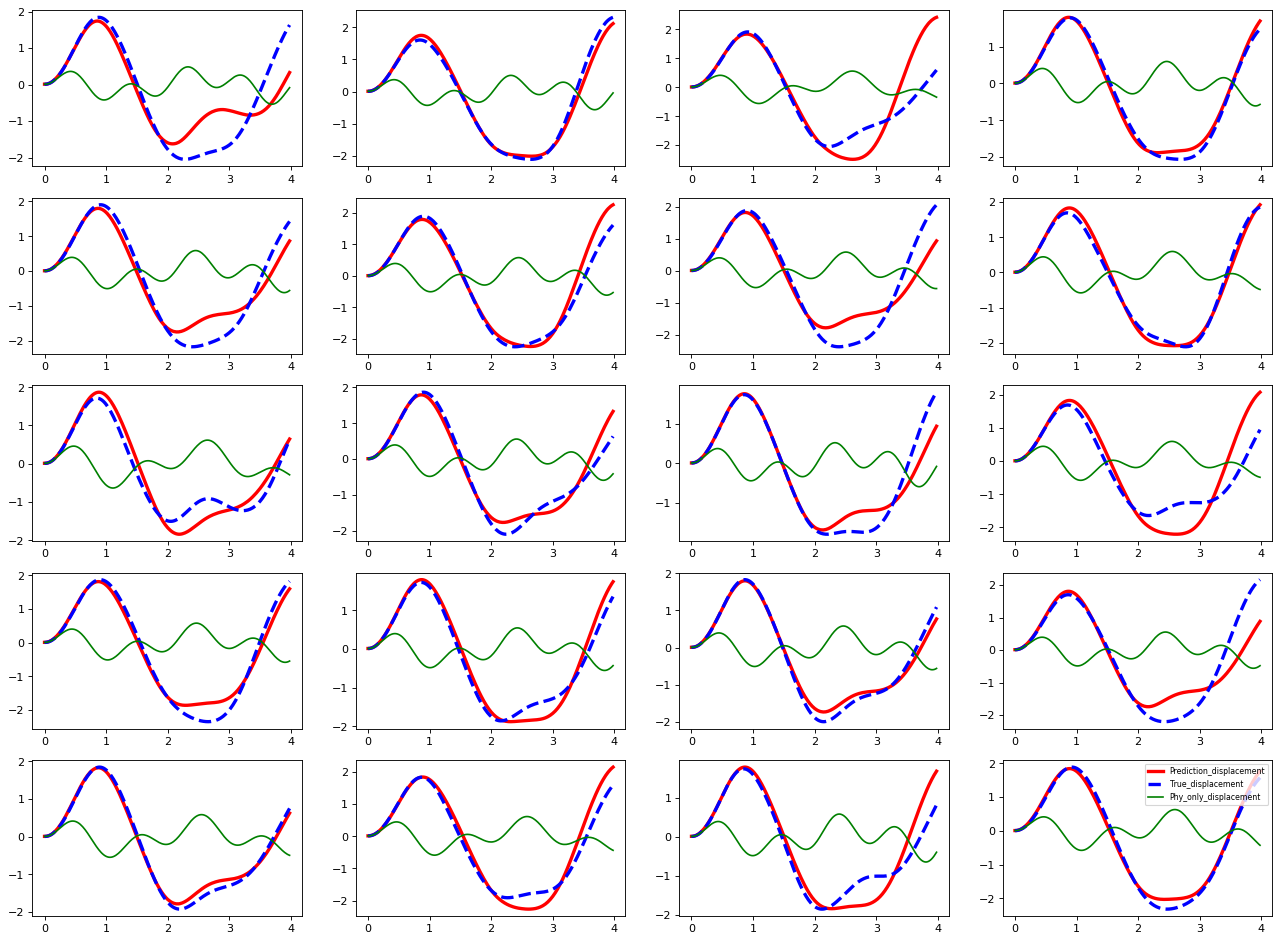

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(20, 15), dpi=80)

for i in range(20):
    
    plt.subplot(5,4,i+1)
    plt.plot(t,cf_x2[i,:], 'r',linewidth=3,label="Prediction_displacement")
    plt.plot(t,cf_x_true_dis2[i,:], 'b',linestyle='dashed',linewidth=3,label="True_displacement")
    plt.plot(t,cfx2_phy_only[:,i,0], 'g',label="Phy_only_displacement")
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=7)
plt.show()

In [ ]:
# calculate mean of n displacement:
# pred
cf_x2_mean = []
cf_x2_T = cf_x2.T
for x in cf_x2_T:
   #print(x.shape)
    cf_x2_mean.append(x.mean())

# true
cf_x2_true_dis_mean =[]
cf_x2_true_dis_T = cf_x_true_dis2.T
for y in cf_x2_true_dis_T:
   #print(x.shape)
    cf_x2_true_dis_mean.append(y.mean())

# phy only
cf_x2_phy_dis_mean =[]
for z in cfx2_phy_only[:,:,0]:
   #print(x.shape)
    cf_x2_phy_dis_mean.append(z.mean())

In [ ]:
# calculate std of n displacement

#pred
cf_x2_std = []
cf_x2_T = cf_x2.T
for x in cf_x2_T:
   #print(x.shape)
    cf_x2_std.append(x.var())

#true
cf_x2_true_dis_std =[]
cf_x2_true_dis_T = cf_x_true_dis2.T
for y in cf_x2_true_dis_T:
   #print(x.shape)
    cf_x2_true_dis_std.append(y.var())

# phy only
cf_x2_phy_dis_std =[]
for z in cfx2_phy_only[:,:,0]:
   #print(x.shape)
    cf_x2_phy_dis_std.append(z.var())


In [ ]:
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0

<Figure size 432x288 with 0 Axes>

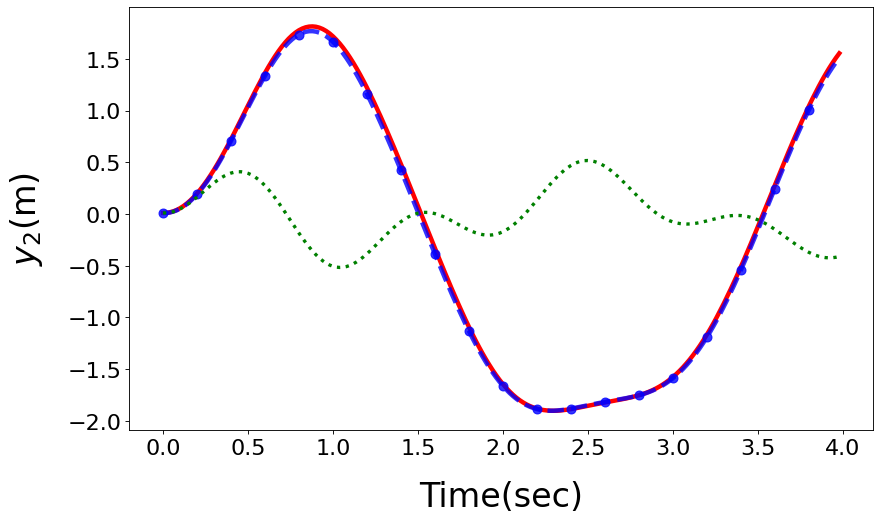

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
plt.figure()
figure(figsize=(12, 7), dpi=80)
# Plot the means
plt.plot(t, cf_x2_mean, color='red',linewidth=4)#,label="Predicted(mean)")
plt.plot(t,cf_x2_true_dis_mean, color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#, label="Ground Truth(mean)") #
plt.plot(t,cf_x2_phy_dis_mean, 'g',linewidth = 3,linestyle=':')#,label="Physics only(mean)")


# # Plot the confidence interval
#plt.fill_between(t, (cf_x2_mean-ci_x), (cf_x2_mean+ci_x), color='blue', alpha=0.1)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("$y_2$(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

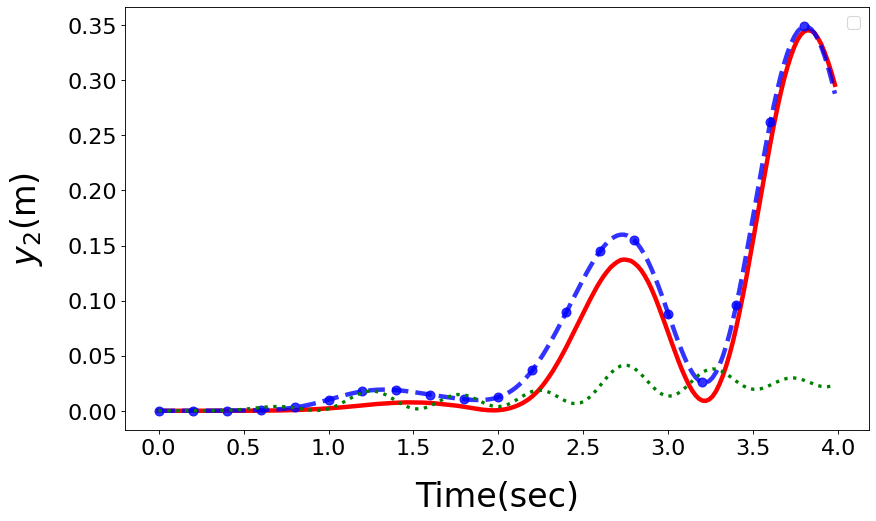

In [ ]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
#Plot the variance

plt.plot(t, cf_x2_std, color='red',linewidth =4)# ,label="Predicted(variance)")
plt.plot(t,cf_x2_true_dis_std,color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#,label="Ground Truth(variance)")
plt.plot(t,cf_x2_phy_dis_std,color='green',linewidth = 3,linestyle=':')#,label="Physics only(Variance)")
plt.legend(loc='upper right',fontsize=15)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("$y_2$(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

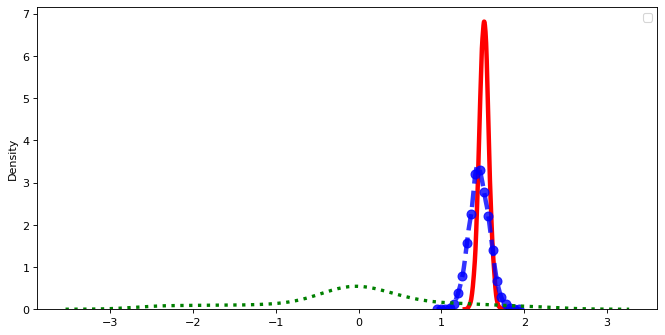

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(10, 5), dpi=80)
sns.distplot(a=cf_x2[:,55], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis2[:,55], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx2_phy_only[:,55], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Training samples:500")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.legend(loc='upper right',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

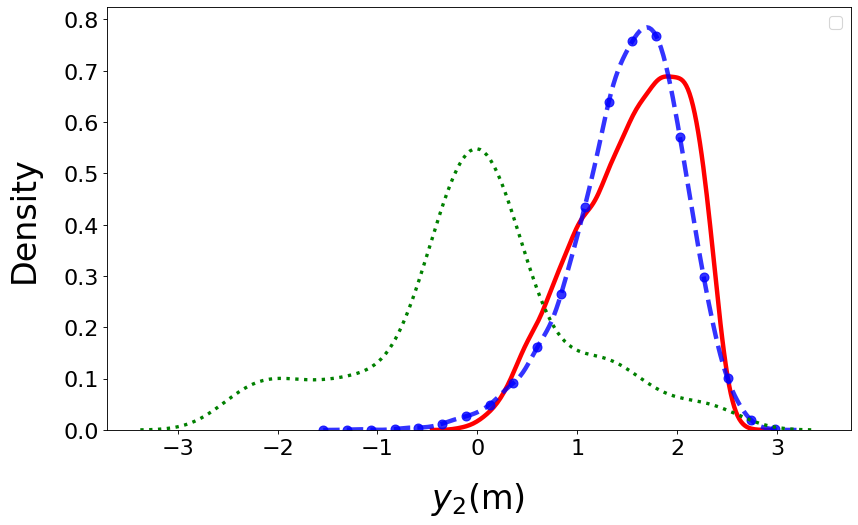

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(12, 7), dpi=80)
sns.distplot(a=cf_x2[:,199], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis2[:,199], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx2_phy_only[:,199], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Training samples:500")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.legend(loc='upper right',fontsize=15)
plt.xlabel("$y_2$(m)",fontsize = 30, labelpad=20)
plt.ylabel("Density",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

# Error

In [ ]:
err_two=np.empty((5000,200))
for i in range(5000):
    err_two[i,:] = ((cf_x_true_dis2[i,:]- cf_x2[i,:])**2)

In [ ]:
err_two_mean = np.empty((200))
for i in range(200):
    err_two_mean[i] = err_two[:,i].mean() 

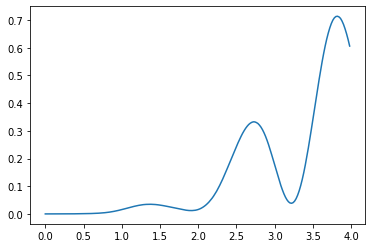

In [ ]:
	
plt.plot(t,err_two_mean)

In [ ]:
def save_error(name,data):
  np.save('MSE_{}.npy'.format(name),data)
  print("saved data")

In [ ]:
save_error(2,err_two_mean)

saved data


In [ ]:
err_per=np.empty((5000,200))
for i in range(5000):
    err_per[i,:] = ((cf_x_true_dis2[i,:]- cf_x2[i,:])/cf_x_true_dis2[i,:])

In [ ]:
err_per.mean()

0.11154535759783292

In [ ]:
cf_x_true_dis2[0,180:200]

array([0.1867318 , 0.26753342, 0.34796634, 0.42783502, 0.50695693,
       0.58515918, 0.66227973, 0.73816729, 0.81268078, 0.88568866,
       0.95706785, 1.02670252, 1.09448266, 1.1603024 , 1.22405934,
       1.28564978, 1.34497142, 1.40191913, 1.45638394, 1.5082525 ])

In [ ]:
cf_x2[0,180:200]

array([0.28082278, 0.36808896, 0.4546071 , 0.54088503, 0.62643045,
       0.7107254 , 0.7938097 , 0.8753203 , 0.9553137 , 1.0333787 ,
       1.1096509 , 1.1838989 , 1.2554901 , 1.3241885 , 1.3900468 ,
       1.4529089 , 1.5127167 , 1.5690396 , 1.6212088 , 1.6697937 ],
      dtype=float32)